<div style="background-color:black; padding:20px; color:white; font-family:Arial;">
    <h1 style="color:orange;">National College of Ireland</h1>
    <h2 style="color:white;">Masters in Science in Data Analytics</h2>
    <h3 style="color:orange;">(MSCDAD_A / MSCDAD_B / MSCDAD_C / PGDDA_SEP24)</h3>
    <h2 style="color:white;">Statistics & Optimisation</h2>
    <h3 style="color:orange;">Continuous Assessment (35%)</h3>
    <h4 style="color:white;">Release Date: 8th November 2024</h4>
    <h4 style="color:white;">Submission Date: 2nd December 2024</h4>
</div>


<div style="background-color:black; padding:10px; font-family:Arial;">
    <span style="color:white; font-weight:bold;">Author:</span>
    <span style="color:orange;">Konstantin Frolov</span>
    <br>
    <span style="color:white; font-weight:bold;">Student Number:</span>
    <span style="color:orange;">24117951</span>
</div>


---

**1. Introduction**

This assessment is structured to evaluate the learning outcomes of the *Statistics and Optimization* module. The key learning outcomes (LOs) are outlined as follows:

- **LO1:** Demonstrate the ability to apply appropriate statistical inference techniques to analyze data across diverse domains.  
- **LO2:** Effectively interpret and communicate results generated by statistical software packages and programming languages, adhering to comprehensive, ethical, and professional standards.  
- **LO3:** Critically evaluate, select, and apply regression models tailored to specific problem domains.  
- **LO4:** Critically evaluate, select, and apply appropriate modeling and forecasting techniques for time series data.  

**2. Objectives of the Assessment**

This assessment aims to showcase proficiency in **multiple linear regression** and **time series analysis** by employing relevant datasets and methodologies.

**2.1 Multiple Linear Regression**

To demonstrate expertise in multiple linear regression, I will utilize the dataset provided in the file named *mlr1.csv*. This dataset will serve as the foundation for performing and interpreting regression analysis.

**2.2 Time Series Analysis**

For time series analysis, I will work with the dataset contained in *ts1.csv*. The data will be partitioned sequentially into training and testing sets. The proportion of the split will be determined by me, with an example split being 80% of the data allocated for training and the remaining 20% for testing. This approach ensures proper validation of the applied forecasting techniques.

---

# Multiple Linear Regression

1. Analyze Dataset
2. Data Examination
    - 2.1. Show a concise summary of the dataset.
    - 2.2. Generates summary statistics for numeric columns.
    - 2.3. Examine column names, data types, and structure.
    - 2.4. Inspect for Missing Values
    - 2.5. Check for Duplicates
    - 2.6. Detect and Handle Outliers
    - 2.7. Explore Categorical Variables
    - 2.8. Visualize Data Relationships
    - 2.9. Compute Correlations
3. Exploratory Data Analysis (EDA)
    - 3.1. Detailed Variable Analysis
    - 3.2. Histograms
    - 3.3. Boxplots
    - 3.4. Scatter plots
    - 3.5. Heatmap
    - 3.6. Outliers
4. Data Preparation
    - 4.1. Capping outliers
    - 4.2. Saving datasets
    - 4.3. Visual Comparison of Capped vs. Unprocessed Data
    - 4.4. Missing Values
    - 4.5. Feature Scaling
    - 4.6. Multicollinearity Check
    - 4.7. One-Hot Encoding
    - 4.8. Split into Train and Test
    - 4.9. Store in Pickle format
5. Model Training
    - 5.1. Load and Prepare Datasets
    - 5.2. Train Model(MLR) on the original dataset
    - 5.3. Storing results
    - 5.4. Train Model(MLR) on the processed dataset.
    - 5.5. Storing results.
6. Results.
    - 6.1 R2 / MSE / RMSE
    - 6.2. OLS Regression Results.
    - 6.3. the Gauss-Markov assumptions.
    - 6.3.1. Linearity.
    - 6.3.2. Normality of Residuals.
    - 6.3.3. Multicollinearity.
    - 6.3.4. Autocorrelation.
    - 6.3.5. Homoscedasticity.
7. Evaluation.
    - 7.1. Load the train and test datasets
    - 7.2. Evaluate the model using a test data set.
    - 7.3. Conclusion.
8. References.

---

All Inputs (libraries which are used in this project listed below)

In [896]:
# Imports
import pandas as pd # Used for data processing
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import numpy as np # Used for data processing
from sklearn.preprocessing import StandardScaler # Used for scaling features
from sklearn.model_selection import train_test_split # Used for splitting the dataset into train and test
from sklearn.linear_model import LinearRegression # Initialize model
from sklearn.metrics import mean_squared_error, r2_score # Model evaluation
import statsmodels.api as sm # For using stats model
from statsmodels.stats.diagnostic import normal_ad # Used for normality of residuals
from statsmodels.tsa.stattools import adfuller # used for stationarity data detection
from statsmodels.tsa.arima.model import ARIMA # Initialize model
from statsmodels.tsa.stattools import adfuller # Used for stationarity check
from statsmodels.tsa.stattools import acf # Used for ARiMA valuation
from statsmodels.stats.stattools import durbin_watson # Useed for durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor # Used for multicollinearity

reading data from a CSV file 

---

# 1. Analyze Dataset

In [900]:
# Import dataset
file_path = '~/Documents/Jupyter/Data_Playground/mlr_data/mlr1.csv'
data = pd.read_csv(file_path)
data.head(5)

,y,x1,x2,x3
0,20283.304745,60.177299,199.188565,A
1,12855.885971,47.144881,191.762047,C
2,16713.972603,56.817205,197.758224,B
3,16560.698733,53.752551,206.358335,A
4,15625.545454,52.619104,197.304964,A


In [901]:
# Step 1: Check dataset dimensions (rows, columns)
dimensions = data.shape
print(f"Dataset dimensions: {dimensions}")

Dataset dimensions: (1000, 4)


In [902]:
# Step 2: Check data types for each column
data_types = data.dtypes
print("\nData types for each column:")
print(data_types)


Data types for each column:
y     float64
x1    float64
x2    float64
x3     object
dtype: object


In [903]:
# Step 3: Define levels of measurement manually
levels_of_measurement = {
    "y": "Ratio",        # Continuous numeric with a true zero
    "x1": "Ratio",       # Continuous numeric with a true zero
    "x2": "Ratio",       # Continuous numeric with a true zero
    "x3": "Nominal"      # Categorical variable with no inherent order
}
print("\nLevels of measurement:")
levels_of_measurement


Levels of measurement:


{'y': 'Ratio', 'x1': 'Ratio', 'x2': 'Ratio', 'x3': 'Nominal'}

---

# 2. Data Examination

### 2.1. Show a concise summary of the dataset.

    Provide a concise summary of the dataset, which helps to understand the number of non-null entries in each column, the data types of each column, and the overall memory usage.

In [907]:
# Dispaly the summary of a dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   float64
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


### 2.2. Generates summary statistics for numeric columns.
    Calculates summary statistics for numerical columns, providing essential metrics such as mean, median, minimum, maximum, and standard deviation to analyze data distribution effectively.

In [909]:
# Dispaly the summary statistics for numeric columns
data.describe()

,y,x1,x2
count,1000.000000,1000.000000,1000.000000
mean,15542.505978,50.228282,199.974218
std,2184.409266,6.042991,4.345845
min,7022.067629,25.880961,182.907198
25%,14289.370886,47.107488,197.753484
50%,15470.707674,50.257170,200.039217
75%,16853.107843,53.323803,202.399248
max,23706.182507,70.221064,214.697405


### 2.3. Examine column names, data types, and structure.
    Pandas DataFrame.dtypes attribute returns a series with the data type of each column.

In [911]:
# return the dtype of each column
data_info = data.dtypes

# Display the result
data_info

y     float64
x1    float64
x2    float64
x3     object
dtype: object

### 2.4. Inspect for Missing Values

    Missing values are a common challenge in data analysis. They occur when certain data points for a variable are missing. This issue is particularly critical during model building, as missing values can significantly impact the accuracy and reliability of the models. Therefore, it's essential to handle missing values carefully.

    Not all missing values need to be removed. In some cases, you might replace them with the median, which is useful for skewed data or when outliers are present. Alternatively, you could replace missing values with the mean of the column or the most frequent value (mode), especially for categorical or discrete data. The approach you choose should depend on the nature of the data. By addressing missing values appropriately, you can ensure reliable and unbiased results in your machine-learning projects.

    Using .isnull().sum() allows us to calculate the sum of missing values in each column.

In [913]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display the results
missing_values

y     0
x1    0
x2    0
x3    0
dtype: int64

### 2.5. Check for Duplicates

    Duplicates in datasets can seriously compromise the integrity of the training and test data, resulting in unreliable outcomes. It is crucial to ensure data cleanliness to maintain model effectiveness.

In [915]:
# Check for duplicate rows in a dataset
duplicate_rows = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')

Number of duplicate rows: 0


### 2.6. Detect and Handle Outliers

    Outliers are data that stand out significantly from the rest of the observations in a data set. Outliers can arise from a variety of factors, including measurement errors, natural variations, or rare events. Outliers can also affect statistical analysis, specifically by influencing metrics such as the mean and standard deviation. Removing outliers can improve the accuracy of statistical results and improve the performance of certain machine learning algorithms. I will cover this part of the EDA process in more detail.

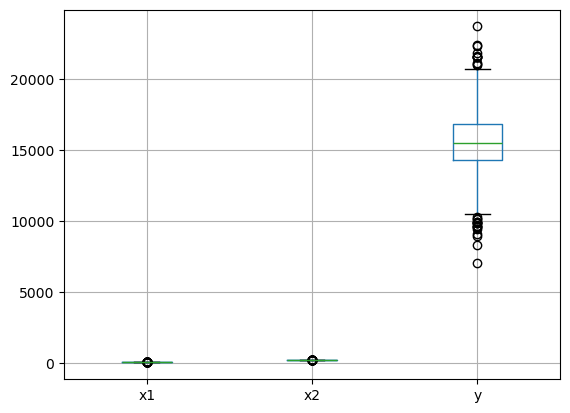

In [917]:
# Dispaly boxplot for numeric columns
data[['x1', 'x2', 'y']].boxplot()
plt.show()

In [918]:
# Interquartile range method
Q1 = data['y'].quantile(0.25)
Q3 = data['y'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = (Q3 + (1.5 * IQR))
lower_fence = (Q1 - (1.5 * IQR))

# Using the fences demonstrates the outliers in the dataset.
outliers = data['y'][(data['y'] < lower_fence) | (data['y'] > upper_fence)]
print(outliers)

5       9625.124453
59      7022.067629
95     10165.425543
117     9437.909953
119    21554.449814
127     9924.992677
140    22336.209908
144    21587.901201
157    21521.989406
174     9830.851450
187    10267.828572
235    21161.861415
259    21578.058466
409     8960.247306
417     9961.075323
594     9084.263777
604    21599.375260
634    23706.182507
679     9628.397342
739     9830.245236
750     8286.839071
812    21075.916226
840     9579.275689
862    21865.840279
897    20990.280682
909    22415.237538
942     9865.528427
949     9594.214799
984    10119.755636
Name: y, dtype: float64


## 2.7. Explore Categorical Variables

    Categorical data represents information organized into distinct groups rather than numeric formats, exemplified by categories like gender, fuel type, and education level. This type of data is prevalent across numerous real-life datasets, yet many algorithms struggle to manage it effectively. One-hot encoding emerges as the most effective and commonly employed method for addressing non-ordinal categorical data. This technique involves creating a new feature for each category, clearly indicating whether each observation belongs to that category with a value of 1 or not with a value of 0. With this approach, we can confidently enhance the handling of categorical data in our analyses. In this case, I am only examining the data, this is why I will use the One-hot encoding in the EDA process.    

In [920]:
# Display category values and their counts
print(data['x3'].value_counts())

x3
B    430
A    293
C    277
Name: count, dtype: int64


### 2.8. Visualize Data Relationships

    Analyzing and visualizing individual variables is not enough for effective exploratory data analysis. To draw meaningful conclusions, it is important to understand how the variables in a data set interact with each other. There are various methods for visualizing these relationships, but scatterplots stand out as one of the most effective tools. A scatterplot visually illustrates the relationship between two variables, with one variable plotted on the x-axis and the other on the y-axis. This allows you to assess the correlation between the two variables, making it a vital data analysis technique.

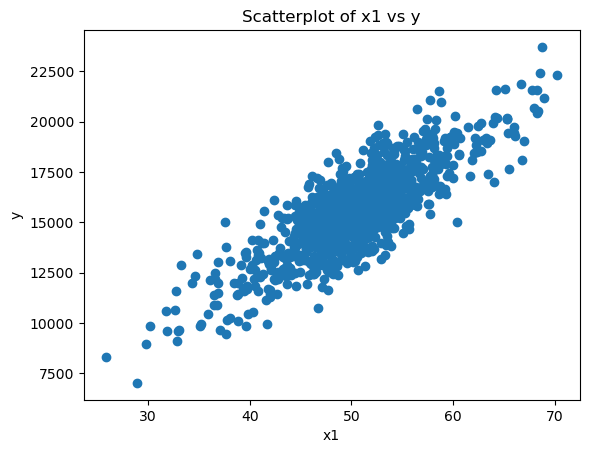

In [922]:
# Scatterplot: x1 vs y
plt.scatter(data['x1'], data['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Scatterplot of x1 vs y')
plt.show()

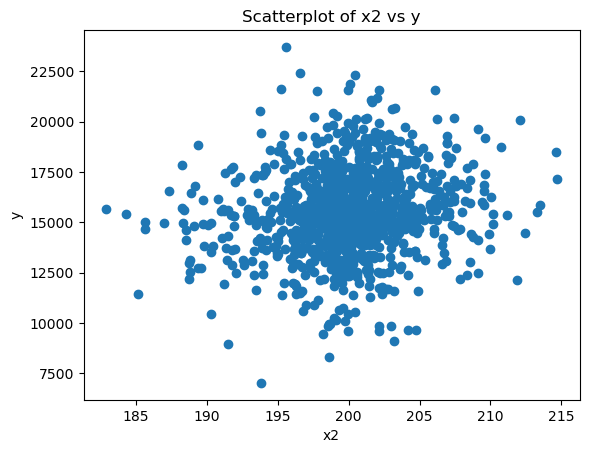

In [923]:
# Scatterplot: x2 vs y
plt.scatter(data['x2'], data['y'])
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Scatterplot of x2 vs y')
plt.show()

### 2.9. Compute Correlations

    Variables in a dataset can be related for several reasons. One may cause changes in another, be weakly associated, or depend on an unknown third variable. Understanding these relationships is essential for data analysis and modeling. 

    Correlations categories:
    - Positive Correlation - Both variables change in the same direction.
    - Neutral Correlation - No relationship exists between the variables.
    - Negative Correlation - Variables change in opposite directions.

    Multicollinearity occurs when closely related variables negatively impact certain algorithms, such as linear regression, where removing one correlated variable can improve model accuracy. Additionally, examining the correlation between input and output variables helps identify which inputs are relevant for modeling. Depending on our knowledge of the relationship and the distribution of the variables, various correlation scores can be calculated.
   
    There are several methods to calculate correlation, such as Pearson’s Correlation, Spearman’s Correlation, and Covariance. For now, I will demonstrate the standard approach to calculating correlation, and in later discussions, I will explore additional methods.

In [925]:
# Display correlation matrix
correlation_matrix = data[['y', 'x1', 'x2']].corr()
print(correlation_matrix)

          y        x1        x2
y   1.00000  0.822670  0.152280
x1  0.82267  1.000000  0.021572
x2  0.15228  0.021572  1.000000


    A = Correlation coefficient
    B = Correlation strength
    C = Correlation type

|      A      |      B       |     C     |
|:-----------:|:------------:|:---------:|
| -.7 to -1   | Very strong  | Negative  |
| -.5 to -.7  | Strong       | Negative  |
| -.3 to -.5  | Moderate     | Negative  |
|  0 to -.3   | Weak         | Negative  |
|  0          | None         | Zero      |
|  0 to .3    | Weak         | Positive  |
|  .3 to .5   | Moderate     | Positive  |
|  .5 to .7   | Strong       | Positive  |
|  .7 to 1    | Very strong  | Positive  |


As I can see from the correlation matrix, the following relationships:
using the correlation coefficient table, there is a strong relationship between `y` and `x1`, and I can say that they are closely related, where `x1` is probably a key predictor for `y`. On the other hand, I see a weak relationship between `y` and `x2`, this may mean that `x2` plays a limited role in predicting `y`. This is only an examing of the raw data, we will see how this all going to change in further processes.

---

# 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an essential technique utilized by data scientists to analyze and investigate data sets, effectively summarizing their key characteristics using data visualization methods. The main objective of EDA is to uncover insights from the data that extend beyond traditional modeling or hypothesis testing. It significantly enhances our understanding of the variables within the data set and the relationships among them.

### 3.1. Detailed Variable Analysis

    Use histograms to effectively visualize distributions, understand their spread, and identify any asymmetry. When faced with variables that are significantly skewed or contain outliers, it is necessary to apply appropriate transformations, such as logarithm or square root, to ensure the accuracy of the analysis.

### 3.2. Histograms

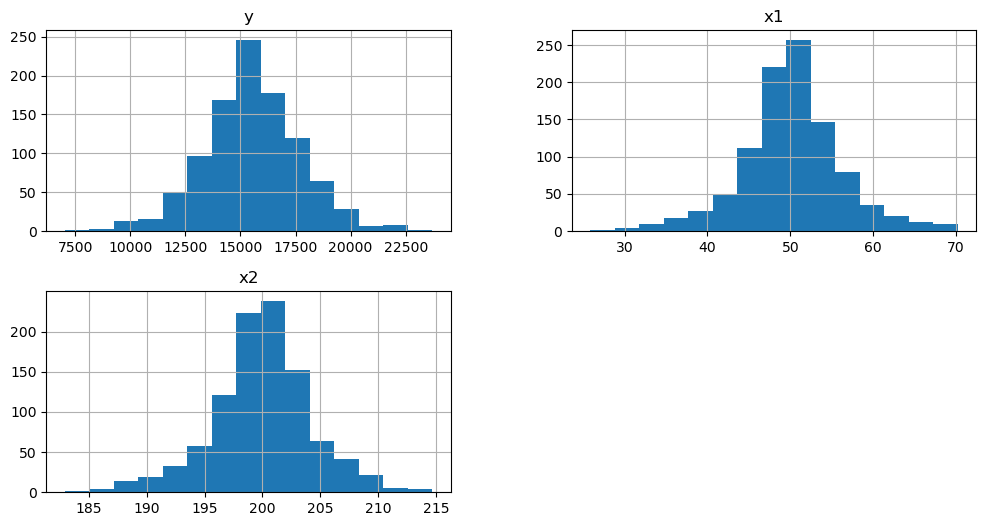

In [933]:
# Display histograms for the numerical variables
numeric_cols = ['y', 'x1', 'x2']
data[numeric_cols].hist(bins=15, figsize=(12, 6))
plt.show()

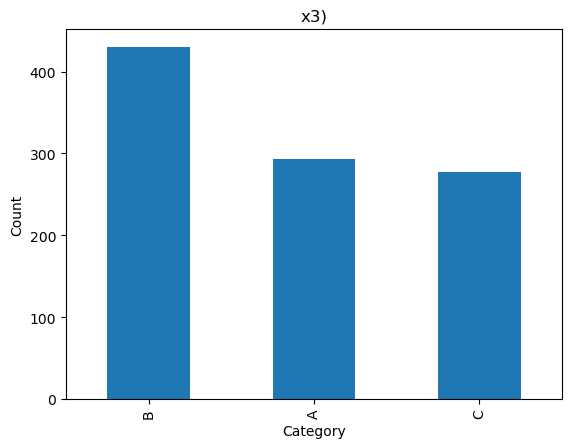

In [934]:
# Display histograms this time for the categorical variables
data['x3'].value_counts().plot(kind='bar', title='x3)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### 3.3. Boxplots

    I will analyze how the categorical variable x3 interacts with the numeric variables y, x1, and x2 using box plots. Understanding the influence of a categorical variable on a numeric variable is essential, as it provides valuable insights for predictive modeling and feature selection.

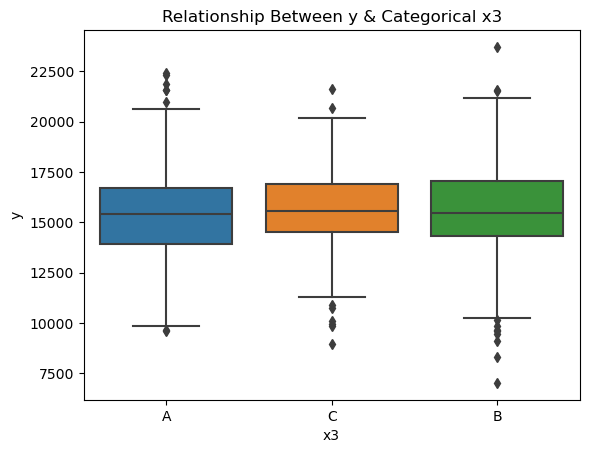

In [936]:
# Display boxplot, to see how x3 categories affect y
sns.boxplot(x='x3', y='y', data=data)
plt.title('Relationship Between y & Categorical x3')
plt.show()

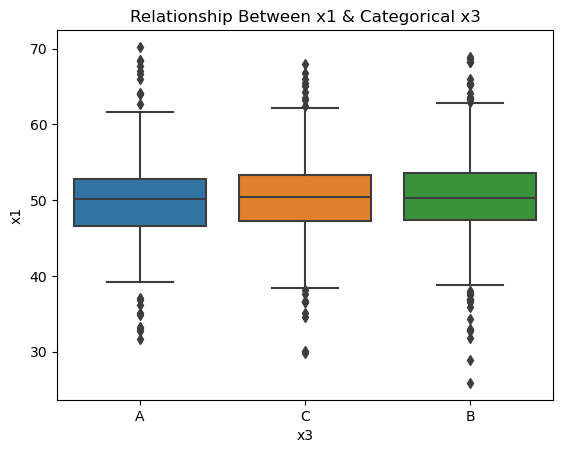

In [937]:
# Display boxplot, to see how x3 categories affect x1
sns.boxplot(x='x3', y='x1', data=data)
plt.title('Relationship Between x1 & Categorical x3')
plt.show()

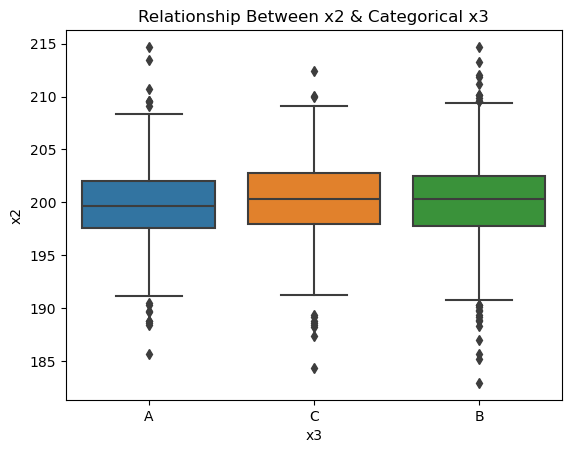

In [938]:
# Display boxplot, to see how x3 categories affect x1
sns.boxplot(x='x3', y='x2', data=data)
plt.title('Relationship Between x2 & Categorical x3')
plt.show()

### 3.4. Scatter plots

    A scatterplot is an essential tool for clearly demonstrating the relationship between two quantitative variables measured across the same observations. The values of one variable are prominently displayed on the horizontal axis, while the values of the other variable are shown on the vertical axis. Each observation in the dataset is represented as a distinct point on the graph, effectively highlighting the relationship between the two variables. This visualization makes the correlation unmistakable and easy to interpret.

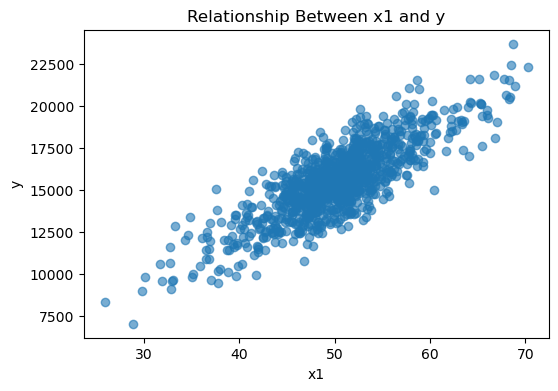

In [940]:
plt.figure(figsize=(6, 4))
plt.scatter(data['x1'], data['y'], alpha=0.6)
plt.title('Relationship Between x1 and y')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

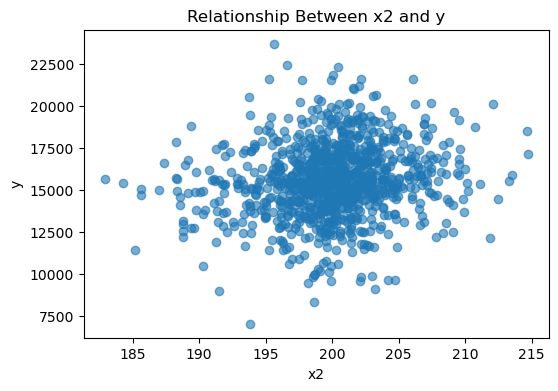

In [941]:
plt.figure(figsize=(6, 4))
plt.scatter(data['x2'], data['y'], alpha=0.6)
plt.title('Relationship Between x2 and y')
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

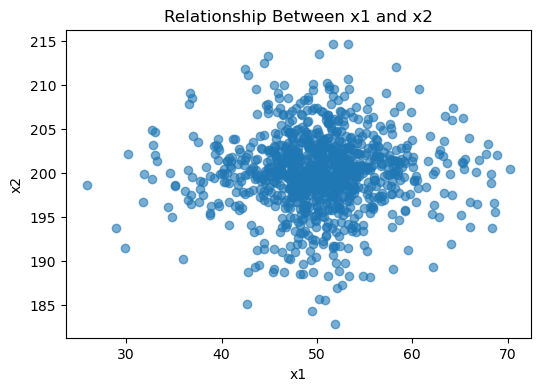

In [942]:
plt.figure(figsize=(6, 4))
plt.scatter(data['x1'], data['x2'], alpha=0.6)
plt.title('Relationship Between x1 and x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### 3.5. Heatmap

    A correlation heatmap is a powerful tool that visually represents a 2D correlation matrix between two discrete dimensions. It effectively employs colored cells, typically derived from a monochromatic scale, to convey critical data. The first dimension's values are displayed as rows, while the second dimension's values are placed in the columns. Each cell's color is directly proportional to the number of measurements that correspond to the specific dimensional value.

    This design makes correlation heatmaps exceptionally effective for data analysis, allowing patterns to emerge clearly and highlighting significant differences and variations within the data. Like all effective heatmaps, correlation heatmaps are equipped with a color bar, ensuring that the data remains easily readable and comprehensible.

In [944]:
# Display the data which will be plotted
print(data.corr(numeric_only=True))

          y        x1        x2
y   1.00000  0.822670  0.152280
x1  0.82267  1.000000  0.021572
x2  0.15228  0.021572  1.000000


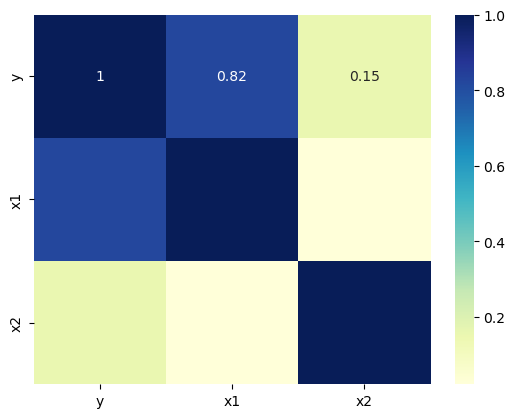

In [945]:
# Plotting correlation heatmap
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

    The correlation between y and x1 is extremely strong, with a value of 0.82267. In comparison, the correlation between y and x2 is weak, sitting at 0.15228. Moreover, the correlation between x1 and x2 indicates that there is no relationship between these two variables, as evidenced by a value of 0.02157.

### 3.6. Outliers

    Detecting and treating outliers is a critical step in data preprocessing. Outliers can severely compromise statistical analysis and diminish the accuracy of machine learning algorithms. This has been evident in my analysis of the data.

How to Handle Outliers:

    A) Remove Outliers when:
    - The outliers are extreme and skew regression results.
    - They do not represent valid data, such as entry errors.

    B) Cap Outliers if:
    - You believe the extreme values hold significance but you want to minimize their influence on the regression analysis.
    
    C) Use Robust Regression if:
    - You intend to retain all data points while mitigating the impact of outliers. Weighted least squares regression can be effective by assigning less weight to extreme values. Additionally, models like Huber regression or Ridge regression are robust against outliers.

I will fit the regression model after appropriately addressing the outliers and will evaluate the following:
- Coefficients and their significance.
- Residual plots to confirm that assumptions of normality and homoscedasticity are upheld.

Finally, I will compare the results of the model with and without handling the outliers. It’s important to note that the data I am working with lacks comprehensive descriptions so that I could see the straight way out of this situation.

In [948]:
# Q1 - the first quartile 
# Q3 - third quartile
Q1 = data['y'].quantile(0.25)
Q3 = data['y'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['y'] < lower_bound) | (data['y'] > upper_bound)]

# Display results
print(f'Column: y')
print(f' Upper Bound: {upper_bound:.2f}')
print(f' Lower Bound: {lower_bound:.2f}')
print(f'Qty of Outliers: {len(outliers)}')
print()
print(outliers['y'])

Column: y
 Upper Bound: 20698.71
 Lower Bound: 10443.77
Qty of Outliers: 29

5       9625.124453
59      7022.067629
95     10165.425543
117     9437.909953
119    21554.449814
127     9924.992677
140    22336.209908
144    21587.901201
157    21521.989406
174     9830.851450
187    10267.828572
235    21161.861415
259    21578.058466
409     8960.247306
417     9961.075323
594     9084.263777
604    21599.375260
634    23706.182507
679     9628.397342
739     9830.245236
750     8286.839071
812    21075.916226
840     9579.275689
862    21865.840279
897    20990.280682
909    22415.237538
942     9865.528427
949     9594.214799
984    10119.755636
Name: y, dtype: float64


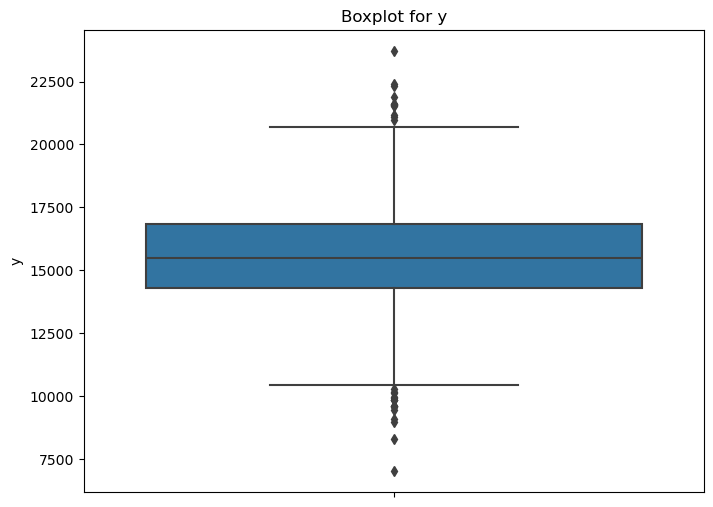

In [949]:
# Display boxplot for the y column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='y')
plt.title('Boxplot for y')
plt.show()

In [950]:
# Q1 - the first quartile 
# Q3 - third quartile
Q1 = data['x1'].quantile(0.25)
Q3 = data['x1'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['x1'] < lower_bound) | (data['x1'] > upper_bound)]

# Display results
print(f'Column: x1')
print(f' Upper Bound: {upper_bound:.2f}')
print(f' Lower Bound: {lower_bound:.2f}')
print(f'Qty of Outliers: {len(outliers)}')
print()
print(outliers['x1'])

Column: x1
 Upper Bound: 62.65
 Lower Bound: 37.78
Qty of Outliers: 66

5      37.037945
19     36.628765
29     63.371402
59     28.872637
60     36.811788
         ...    
939    36.892121
949    32.958806
977    65.423079
994    36.109918
997    63.608642
Name: x1, Length: 66, dtype: float64


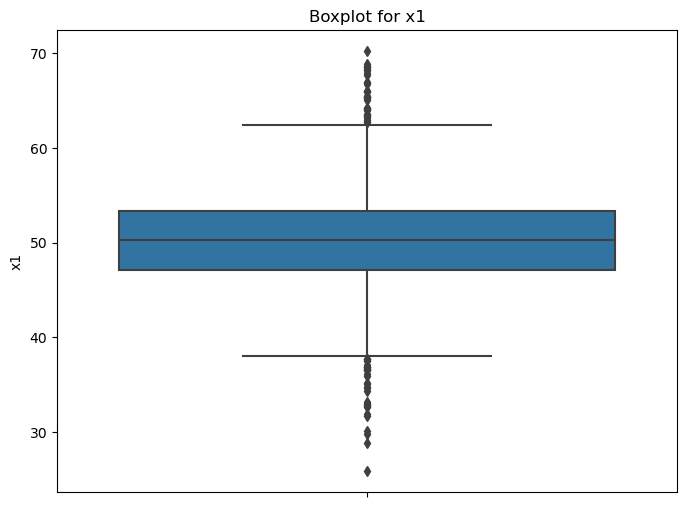

In [951]:
# Display boxplot for the x1 column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='x1')
plt.title('Boxplot for x1')
plt.show()

In [952]:
# Q1 - the first quartile 
# Q3 - third quartile
Q1 = data['x2'].quantile(0.25)
Q3 = data['x2'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['x2'] < lower_bound) | (data['x2'] > upper_bound)]

# Display results
print(f'Column: x2')
print(f' Upper Bound: {upper_bound:.2f}')
print(f' Lower Bound: {lower_bound:.2f}')
print(f'Qty of Outliers: {len(outliers)}')
print()
print(outliers['x2'])

Column: x2
 Upper Bound: 209.37
 Lower Bound: 190.78
Qty of Outliers: 52

24     212.068111
63     209.536737
76     189.749888
96     189.370429
101    190.097126
103    186.991185
104    212.455105
111    189.170539
131    182.907198
138    188.348995
164    190.283435
198    190.273559
226    188.558251
231    188.369681
261    189.701666
263    210.157612
278    209.407705
279    209.580915
283    189.772470
318    190.465242
359    188.776081
371    210.012900
374    188.762407
394    211.159107
403    188.531689
443    214.648255
476    188.286115
496    214.697405
541    213.496306
624    187.332642
638    190.319839
641    209.876559
644    211.864007
656    185.175487
658    189.621167
681    188.786474
691    213.273623
723    209.557113
743    189.129538
759    210.747402
766    188.227024
769    188.791739
791    184.309143
814    209.529396
821    185.657844
861    190.754450
869    189.363803
876    209.956947
893    188.907262
948    210.185328
956    209.601920
986    1

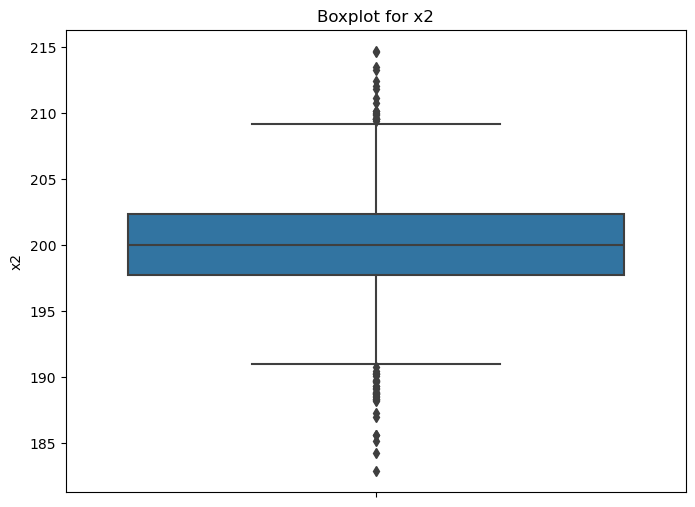

In [953]:
# Display boxplot for the x2 column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='x2')
plt.title('Boxplot for x2')
plt.show()

---

# 4. Data Preparation

    Feature engineering is essential for transforming raw data into valuable information for machine learning models. Any machine learning model's performance depends on the data quality used during training. Therefore, effective feature engineering is a necessary preprocessing technique that requires selecting the most relevant aspects of the raw training data tailored to the specific prediction task and model type.

In [957]:
# Testing: Log transform skewed numerical variables
test = data['x1'].apply(lambda x: np.log(x) if x > 0 else 0)
print(test)

0      4.097295
1      3.853225
2      4.039839
3      3.984391
4      3.963079
         ...   
995    4.009721
996    3.948424
997    4.152749
998    3.850570
999    3.835840
Name: x1, Length: 1000, dtype: float64



Column: y
Lower Bound: 10443.77, Upper Bound: 20698.71
Number of Outliers: 29
Outliers:
                y         x1          x2 x3
5     9625.124453  37.037945  204.208914  A
59    7022.067629  28.872637  193.817461  B
95   10165.425543  37.767251  199.124984  B
117   9437.909953  37.703408  198.163512  B
119  21554.449814  68.242975  199.951671  B
127   9924.992677  41.738436  198.607790  A
140  22336.209908  70.221064  200.423089  A
144  21587.901201  64.184954  206.089715  A
157  21521.989406  58.627879  197.769811  B
174   9830.851450  35.078355  198.569356  A
187  10267.828572  38.013575  198.972467  B
235  21161.861415  68.903260  202.009177  B
259  21578.058466  67.714496  202.141303  A
409   8960.247306  29.818758  191.462934  C
417   9961.075323  35.159360  198.690768  C
594   9084.263777  32.824536  203.197399  B
604  21599.375260  65.099102  195.239492  C
634  23706.182507  68.689348  195.604858  B
679   9628.397342  33.015059  204.720382  B
739   9830.245236  30.145139  2

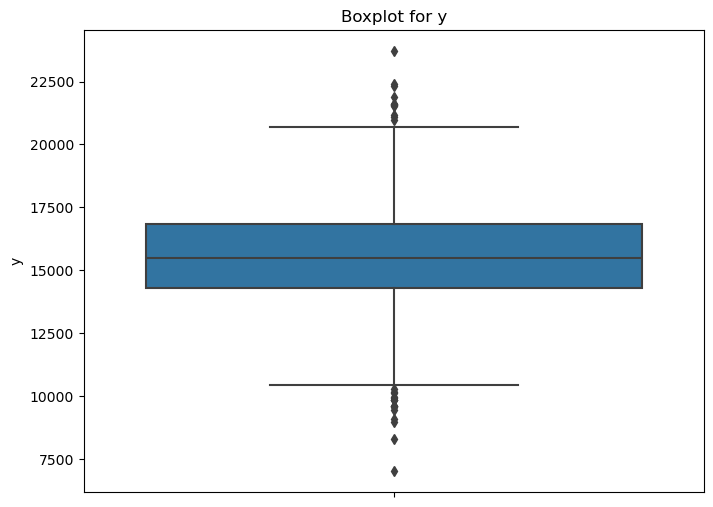


Column: x1
Lower Bound: 37.78, Upper Bound: 62.65
Number of Outliers: 66
Outliers:
                y         x1          x2 x3
5     9625.124453  37.037945  204.208914  A
19   12477.456954  36.628765  209.107779  C
29   19044.196441  63.371402  203.623021  B
59    7022.067629  28.872637  193.817461  B
60   10893.318549  36.811788  197.531385  A
..            ...        ...         ... ..
939  11973.663427  36.892121  199.526524  B
949   9594.214799  32.958806  202.113654  A
977  19417.060927  65.423079  200.424059  B
994  12121.766766  36.109918  197.951778  A
997  19091.941422  63.608642  201.150001  B

[66 rows x 4 columns]


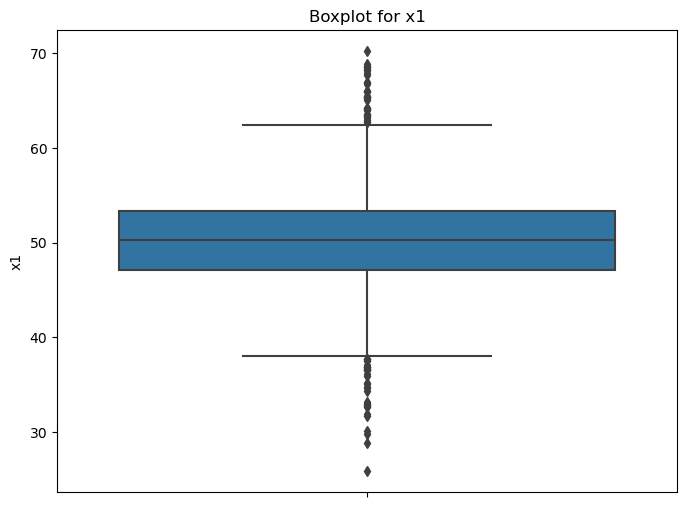


Column: x2
Lower Bound: 190.78, Upper Bound: 209.37
Number of Outliers: 52
Outliers:
                y         x1          x2 x3
24   20085.213371  58.286087  212.068111  B
63   16847.846322  51.288255  209.536737  A
76   16086.530631  52.961028  189.749888  A
96   12704.416813  43.494787  189.370429  B
101  14848.473042  49.398461  190.097126  B
103  14970.504016  52.096834  186.991185  B
104  14446.039426  44.449059  212.455105  C
111  16779.864358  57.926845  189.170539  B
131  15640.368690  51.931732  182.907198  B
138  14949.781078  51.160040  188.348995  A
164  10461.802559  35.894446  190.283435  B
198  14950.527942  47.172299  190.273559  B
226  14121.503420  48.179882  188.558251  A
231  15623.841405  54.847988  188.369681  C
261  14897.197225  48.583455  189.701666  B
263  15402.421748  49.629678  210.157612  B
278  15994.091417  49.607600  209.407705  B
279  19167.462721  60.654234  209.580915  B
283  13814.251905  52.038905  189.772470  B
318  13820.184741  49.863710  190.

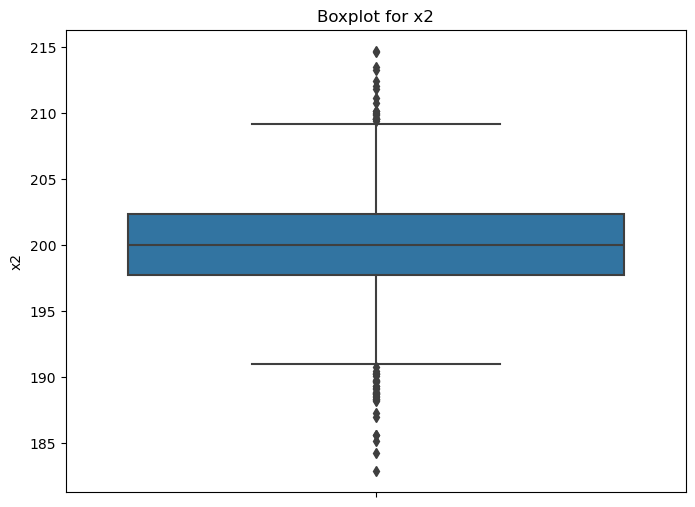

In [958]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                     # Interquartile range
    lower_bound = Q1 - 1.5 * IQR      # Lower bound
    upper_bound = Q3 + 1.5 * IQR      # Upper bound

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for each numerical column
for col in ['y', 'x1', 'x2']:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    if not outliers.empty:
        print(f"Outliers:\n{outliers}")

    # Boxplot to visualize outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot for {col}')
    plt.show()

### 4.1. Capping outliers

    so that I wount be repeating myy self I will use for loop to calculate Q1, Q3, and IQR to get at the end lower and upper bounds for each numerical features.
    to be able to exam the results how well the model was trained in both versions, I must create two datasets, one with outliers, the other with processed outliers

In [960]:
# Create a copy of the dataset for processed data
processed_data = data.copy()

# List of columns to process
columns_to_process = ['y', 'x1', 'x2']

# Iterate through columns to calculate bounds and cap outliers
for col in columns_to_process:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the column values
    processed_data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

    # Display bounds and summary for this column
    print(f"Column: {col}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers Capped: {(data[col] < lower_bound).sum() + (data[col] > upper_bound).sum()}")


Column: y
Lower Bound: 10443.77, Upper Bound: 20698.71
Number of Outliers Capped: 29
Column: x1
Lower Bound: 37.78, Upper Bound: 62.65
Number of Outliers Capped: 66
Column: x2
Lower Bound: 190.78, Upper Bound: 209.37
Number of Outliers Capped: 52


### 4.2. Saving datasets

In [962]:
# Save the original dataset (unprocessed)
file_path_origin = './original_dataset.csv'
data.to_csv(file_path_origin, index=False)
print(f'File saved as {file_path_origin}')

# Save the processed dataset
file_path_pd = './pd_dataset.csv'
processed_data.to_csv(file_path_pd, index=False)
print(f'File saved as: {file_path_pd}')

File saved as ./original_dataset.csv
File saved as: ./pd_dataset.csv


### 4.3. Visual Comparison of Capped vs. Unprocessed Data

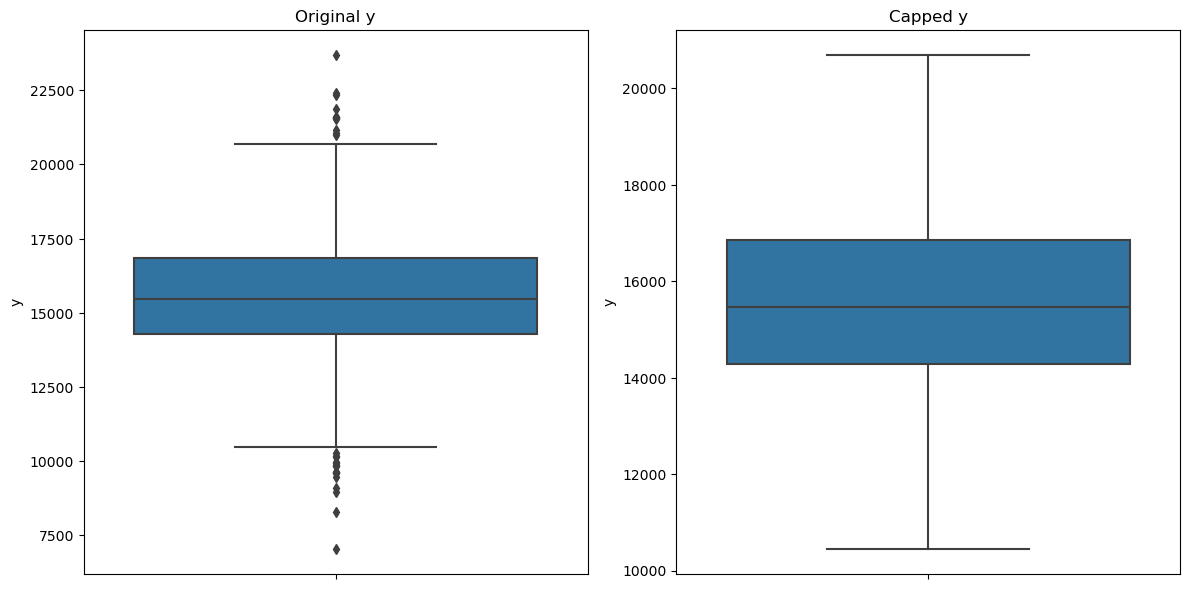

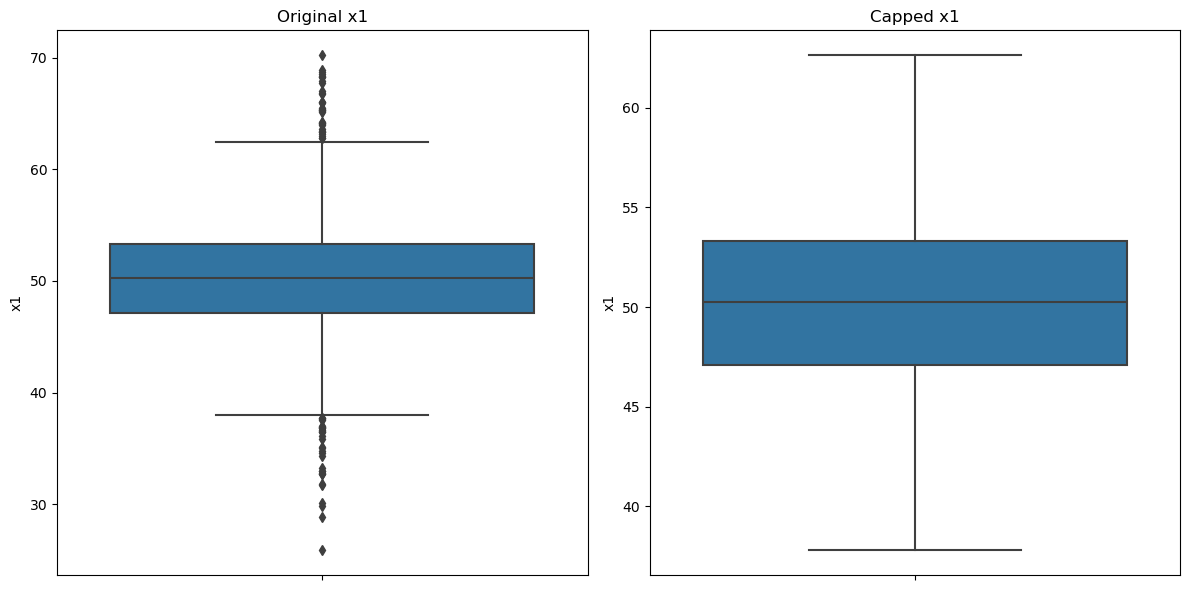

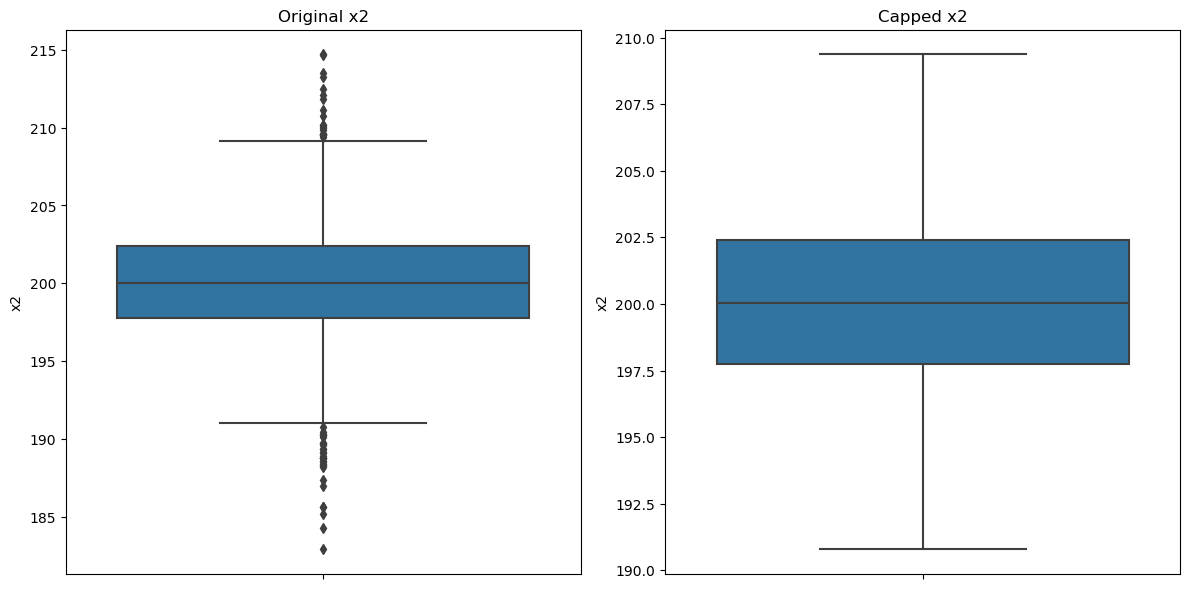

In [964]:
# Visualize original vs capped data
for col in columns_to_process:
    plt.figure(figsize=(12, 6))

    # Original data
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, y=col)
    plt.title(f'Original {col}')

    # Processed data
    plt.subplot(1, 2, 2)
    sns.boxplot(data=processed_data, y=col)
    plt.title(f'Capped {col}')

    plt.tight_layout()
    plt.show()


I have created two distinct datasets, and I will apply all my processes to both of them. I will establish two data frames to store these datasets effectively: one will be designated as `origin_df`, and the other will be named `mod_df`.

In [966]:
origin_df = pd.read_csv('./original_dataset.csv')
mod_df = pd.read_csv('./pd_dataset.csv')

### 4.4. Missing Values

    Detecting and addressing missing values is a critical step in the machine-learning process. However, since our data analysis confirmed that there are no missing values, I can skip this step.    

In [968]:
# Display the count of missing values for each column.
origin_df.isnull().sum()

y     0
x1    0
x2    0
x3    0
dtype: int64

### 4.5. Feature Scaling

    Feature scaling plays a pivotal role in ensuring fair comparisons and accurate predictions by standardizing the scale of numerical features. In machine learning, when working with datasets containing multiple features, it’s crucial to ensure all features are on an equal footing. In my case I will use a multiple linear regression model in this case it does not strictly require scaling, on the other hand for models using regularization like Ridge or Lasso regression, scaling is strongly recommended.

In [970]:

# Choose the columns on which I will apply the scaler process
scale_data = ['x1', 'x2']
scaler = StandardScaler()

# Applying scaling method
origin_df[scale_data] = scaler.fit_transform(origin_df[scale_data])
mod_df[scale_data] = scaler.fit_transform(mod_df[scale_data])

Display the results

In [972]:
origin_df.head(5)

,y,x1,x2,x3
0,20283.304745,1.647197,-0.180873,A
1,12855.885971,-0.510499,-1.890606,C
2,16713.972603,1.090887,-0.510166,B
3,16560.698733,0.583491,1.469751,A
4,15625.545454,0.395833,-0.614516,A


In [973]:
mod_df.head(5)

,y,x1,x2,x3
0,20283.304745,1.810031,-0.203667,A
1,12855.885971,-0.561597,-2.035116,C
2,16713.972603,1.198564,-0.556403,B
3,16560.698733,0.640861,1.564465,A
4,15625.545454,0.434597,-0.668181,A


### 4.6. Multicollinearity Check

    n regression analysis, multicollinearity is critical when two or more independent variables (predictor variables) are highly correlated. This strong linear relationship among the predictors means they fail to provide unique information for the regression analysis, which can significantly undermine the performance of your machine-learning model.

I must be focused on the following values:

1. Correlation Matrix:
   - Look for values greater than 0.8 or less than -0.8 between features, as these indicate potential multicollinearity that must be addressed.

2. Variance Inflation Factor (VIF):
   - A VIF of less than 5 signals no significant multicollinearity.
   - A VIF between 5 and 10 indicates moderate multicollinearity, which warrants attention.
   - A VIF greater than 10 signifies high multicollinearity; take immediate action to reduce the number of features.

In [975]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

# Define the numerical features to analyze
numerical_features = ['x1', 'x2']

# Correlation Matrix for both datasets
print("Correlation Matrix for origin_df:")
print(origin_df[numerical_features].corr())

print("\nCorrelation Matrix for mod_df:")
print(mod_df[numerical_features].corr())
# ---

# Calculate VIF for both datasets
print("\nVariance Inflation Factor for origin_df:")
print(calculate_vif(origin_df, numerical_features))

print("\nVariance Inflation Factor for mod_df:")
print(calculate_vif(mod_df, numerical_features))


Correlation Matrix for origin_df:
          x1        x2
x1  1.000000  0.021572
x2  0.021572  1.000000

Correlation Matrix for mod_df:
          x1        x2
x1  1.000000  0.022699
x2  0.022699  1.000000

Variance Inflation Factor for origin_df:
  Feature       VIF
0      x1  1.000466
1      x2  1.000466

Variance Inflation Factor for mod_df:
  Feature       VIF
0      x1  1.000516
1      x2  1.000516


Results:

    Origin_df - 0.021572, VIF for x1 and x2 = 1.000466
    
    Mod_df - 0.022699, VIF for x1, and x2 = 1.000516

    This means that there is no multicollinearity between chosen features.

### 4.7. One-Hot Encoding

    In pandas, the `pd.get_dummies()` function efficiently converts string categories, such as gender, into numeric format — assigning 0 to males and 1 to females. It can also convert multi-class features into a one-hot representation, which is an essential practice for data preprocessing in machine learning.
    By default, dummy variables are represented as bool (True and False). You can specify the data type with the dtype argument. 

In [978]:
# Applying the One-hot encode method for the `origin_df` dataset
origin_df = pd.get_dummies(origin_df, columns=['x3'], prefix='x3', dtype='int')

In [979]:
# Displaying results for Origin_df
origin_df.head(5)

,y,x1,x2,x3_A,x3_B,x3_C
0,20283.304745,1.647197,-0.180873,1,0,0
1,12855.885971,-0.510499,-1.890606,0,0,1
2,16713.972603,1.090887,-0.510166,0,1,0
3,16560.698733,0.583491,1.469751,1,0,0
4,15625.545454,0.395833,-0.614516,1,0,0


In [980]:
# Applying the One-hot encode method for the 'mod_df' dataset
mod_df = pd.get_dummies(mod_df, columns=['x3'], prefix='x3', dtype='int')

In [981]:
# Displaying results for Origin_df
mod_df.head(5)

,y,x1,x2,x3_A,x3_B,x3_C
0,20283.304745,1.810031,-0.203667,1,0,0
1,12855.885971,-0.561597,-2.035116,0,0,1
2,16713.972603,1.198564,-0.556403,0,1,0
3,16560.698733,0.640861,1.564465,1,0,0
4,15625.545454,0.434597,-0.668181,1,0,0


### 4.8. Split into Train and Test

    The next crucial step in a project like this is to establish a pipeline. A pipeline automates the sequence of preprocessing steps—such as handling outliers, scaling, and encoding—ensuring consistency while saving valuable time and effort. By implementing a pipeline, I will eliminate the need to repeat each step manually every time I process the data.

    Nevertheless, for this project, my primary focus is to showcase my expertise in applying a multiple regression model to the provided dataset. Therefore, I will intentionally skip the pipeline creation process to streamline my approach and concentrate directly on splitting the dataset into training and testing sets.

    To accomplish this, I will utilize the following method:


        train_test_split(df_text_genre, test_size=0.2, random_state=42, shuffle=True)


    Method explanation:

    - The dataset is effectively divided into 80% training data and 20% testing data.
    - The split is reproducible, thanks to the `random_state=42`.
    - The data is shuffled before splitting, ensuring true randomness.

In [983]:
# Split origin_df into training and testing sets
train_orgn, test_orgn = train_test_split(origin_df, test_size=0.2, random_state=42, shuffle=True)

# Split mod_df into training and testing sets
train_mod, test_mod = train_test_split(mod_df, test_size=0.2, random_state=42, shuffle=True)

In [984]:
# Display the sizes of the resulting splits
print('origin dataframe:\n')
print(f'Training set size - {train_orgn.shape}')
print(f'Testing set size - {test_orgn.shape}')
print('\nModified dataframe:\n')
print(f'Training set size - {train_mod.shape}')
print(f'Testing set size - {test_mod.shape}')

origin dataframe:

Training set size - (800, 6)
Testing set size - (200, 6)

Modified dataframe:

Training set size - (800, 6)
Testing set size - (200, 6)


### 4.9. Store in Pickle format

    Pickle is an essential Python module that effectively handles the serialization and deserialization of Python object structures, processes known as pickling and unpickling. As a core part of the Python standard library, it enables users to save Python objects to files or byte streams, ensuring easy retrieval whenever needed.

    Key Characteristics

* Pickle integrates flawlessly with Python, enabling straightforward serialization and deserialization of even the most complex Python objects.
* It operates at impressive speed, particularly for Python objects like NumPy arrays or Pandas DataFrames, making it an optimal choice for efficient data handling.

In [986]:
# Pickling train and test sets for origin_df
train_orgn.to_pickle('./train_orgn.pkl')
test_orgn.to_pickle('./test_orgn.pkl')

# Pickling train and test sets for mod_df
train_mod.to_pickle('./train_mod.pkl')
test_mod.to_pickle('./test_mod.pkl')

---

# 5. Model Training

    Step 1: Load and Prepare Datasets
    Step 2: Baseline Training
    Step 3: Hyperparameter Tuning
    Step 4: Compare and Select

    results_df - is a data frame where I will store all the results, that I will get after training models

    This data frame will contain the following columns:
- 'Dataset Name' - Name of the dataset based on which data I will train the model,
- 'Model Name' - Describe the type of the model which will be used for training,
- 'H_params' - Description of the hyperparameters that were used for model tuning,
- 'R2' - Shows variance in range from 0 to 1,
- 'MSE' - Shows how well the model was trained,
- 'RMSE' - Shows prediction accuracy

In [991]:
# Initializing a new dataset: 'results_df'
results_df = pd.DataFrame(columns=['Dataset Name', 'Model Name', 'H_params', 'R2', 'MSE', 'RMSE'])

### 5.1. Load and Prepare Datasets

In [993]:
# Identify the target column
target = 'y'

# Identify the predictor columns
predictors = ['x1', 'x2', 'x3_A', 'x3_B', 'x3_C']

# Separate predictors (X) and target (y) for each dataset

# origin_df
X_train_orgn = origin_df[predictors]
y_train_orgn = origin_df[target]

# mod_df
X_train_mod = mod_df[predictors]
y_train_mod = mod_df[target]

### 5.2. Train Model(MLR) on original dataset

In [995]:
# Initialize the Linear Regression model to apply it on origin_df
model_orgn = LinearRegression()

# Train the model on the original dataset
model_orgn.fit(X_train_orgn, y_train_orgn)

# Predictions and evaluations for origin_df
y_pred_orgn = model_orgn.predict(X_train_orgn)
mse_orgn = mean_squared_error(y_train_orgn, y_pred_orgn)
rmse_orgn = np.sqrt(mse_orgn)
r2_orgn = r2_score(y_train_orgn, y_pred_orgn)

### 5.3. Storing results

In [997]:
# Storing the results in Dict: 'orgn_data'
orgn_data = {
    'Dataset Name': 'origin',
    'Model Name': 'Multi Linear Regression',
    'H_params': 'default',
    'R2': r2_orgn,
    'MSE': mse_orgn,
    'RMSE': rmse_orgn
}

In [998]:
# Convert the dictionary into a DataFrame
new_row_df = pd.DataFrame.from_dict([orgn_data])

# Append to the results DataFrame
results_df = pd.concat([results_df, new_row_df], ignore_index=True)

/tmp/ipykernel_6395/2668030878.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row_df], ignore_index=True)


### 5.4. Train Model(MLR) on processed dataset.

In [1000]:
# Initialize the Linear Regression model to apply it on mod_df
model_mod = LinearRegression()

# Train the model on the processed dataset
model_mod.fit(X_train_mod, y_train_mod)

# Predictions and evaluations for mod_df
y_pred_mod = model_mod.predict(X_train_mod)
mse_mod = mean_squared_error(y_train_mod, y_pred_mod)
rmse_mod = np.sqrt(mse_mod)
r2_mod = r2_score(y_train_mod, y_pred_mod)

### 5.5. Storing results.

In [1002]:
# Storing the results in Dict: 'mod_data'
mod_data = {
    'Dataset Name': 'mod',
    'Model Name': 'Multi Linear Regression',
    'H_params': 'default',
    'R2': r2_mod,
    'MSE': mse_mod,
    'RMSE': rmse_mod
}

In [1003]:
# Convert the dictionary into a DataFrame
new_row_df = pd.DataFrame.from_dict([mod_data])  # Wrap in a list to create a single row DataFrame

# Append to the results DataFrame
results_df = pd.concat([results_df, new_row_df], ignore_index=True)

    This demonstrates the default hyperparameters in the Multiple Linear Regression (MLR) model. In the example below I am using the model which I trained on a processed dataset (modified) dataset. The hyperparameters on the model which was trained on the original dataset are the same. Although RandomizedSearchCV or GridSearchCV could be employed to identify the optimal combination of hyperparameter values, I have decided not to use them for this project, as it is not required.

In [1005]:
# Display the default hyperparameters in the Multiple Linear Regression 
model_mod.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

---

# 6. Results

### 6.1 R2 / MSE / RMSE

In [1009]:
# Display the updated DataFrame
results_df

,Dataset Name,Model Name,H_params,R2,MSE,RMSE
0,origin,Multi Linear Regression,default,0.694963,1.454073e+06,1205.849353
1,mod,Multi Linear Regression,default,0.679218,1.417724e+06,1190.682040



This table of results clearly shows the following findings:

- R Square: 69.5% versus 67.9%. 
The model trained on the original dataset, without any adjustments for outliers, outperforms the model trained on the processed dataset. This indicates that I must establish a pipeline that mirrors the processing steps applied to the original dataset.

- MSE (Mean Squared Error): 1.45 compared to 1.41
This result confirms that the processed dataset yields a slightly lower MSE, indicating that the model's prediction accuracy is superior when outliers are not modified.

- RMSE (Root Mean Squared Error): 1205.8 compared to 1190.6
This finding illustrates that the model trained on the processed dataset understands the data marginally better than the one trained on the original dataset. However, given the minimal difference, it is clear that the multiple linear regression model (`model_orgn`) is definitively stronger when trained on the original dataset.

### 6.2. OLS Regression Results.

In [1012]:
# Adding the constant
X_train_orgn_const = sm.add_constant(X_train_orgn)

# Fit the model using statsmodels
model_stats = sm.OLS(y_train_orgn, X_train_orgn_const).fit()

# Display the results
print(model_stats.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     566.7
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.01e-254
Time:                        18:09:10   Log-Likelihood:                -8513.9
No. Observations:                1000   AIC:                         1.704e+04
Df Residuals:                     995   BIC:                         1.706e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.165e+04     29.222    398.840      0.0

This table presents crucial values:

- The R-squared value of 69.5% clearly demonstrates that the model has been effectively trained, indicating a strong fit. However, it also highlights that 30.5% of the variance in the data remains unexplained by this model.

- The F-statistic of 566.7 is impressively high, which confirms that the methods applied to the features make the model exceptionally effective at explaining the variance in the target variable. Furthermore, the associated p-value of 1.01e-254 is so small that it unequivocally suggests this result is statistically significant and not the result of chance.

- The p-values for all predictors (`const`, `x1`, `x2`, `x3_A`) are 0.000, unequivocally indicating that they are highly significant and play a strong role in the model.

- Among the features, the `x3_A` variable exerts the greatest impact on `y`, followed closely by the `x1` variable. This is substantiated by their coefficients: `x3_A` at 3862.7505 and `x1` at 1789.2446, clearly showing their decisive contributions.

# 6.3. the Gauss-Markov assumptions.

1. Linearity
2. Normality of residuals
3. Multicollinearity
4. Autocorrelation
5. Homoscedasticity

### 6.3.1. Linearity

In [1017]:
def check_linearity(actual, predicted):
    
    # Create a DataFrame for plotting
    df_results = pd.DataFrame({'Actual': actual, 'Predicted': predicted})
    
    # Scatter plot: Actual vs Predicted
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
    
    # Plot the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

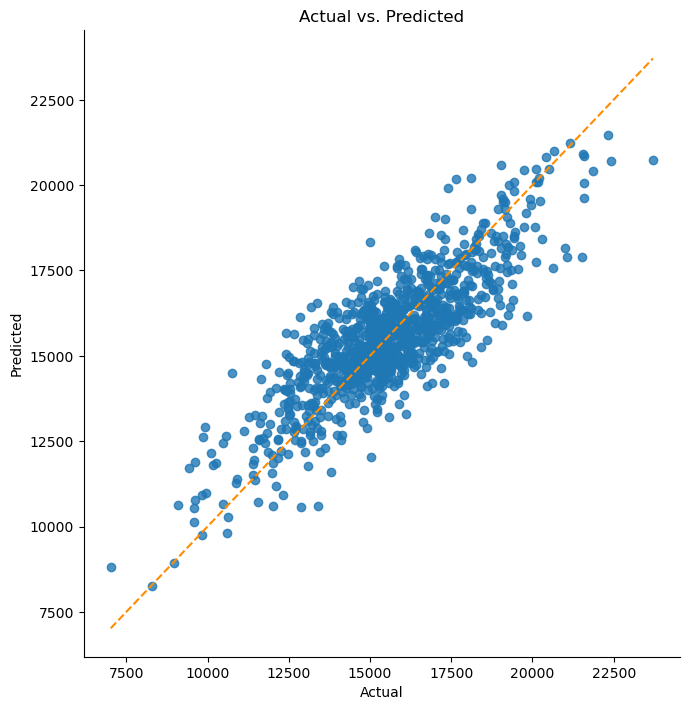

In [1018]:
# For origin dataset
check_linearity(y_train_orgn, y_pred_orgn)

### 6.3.2. Normality of Residuals.

In [1020]:
def check_normality_of_residuals(residuals, p_value_thresh=0.05):
    
    # Performing the test on the residuals
    p_value = normal_ad(residuals)[1]
    print('p-value from the test (below 0.05 means non-normal):', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed.')
    else:
        print('Residuals are normally distributed.')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title('Distribution of Residuals')
    plt.show()

    if p_value < p_value_thresh:
        print('Confidence intervals will likely be affected. Consider transformations.')

p-value from the test (below 0.05 means non-normal): 0.5373477777704732
Residuals are normally distributed.


/home/kosmas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


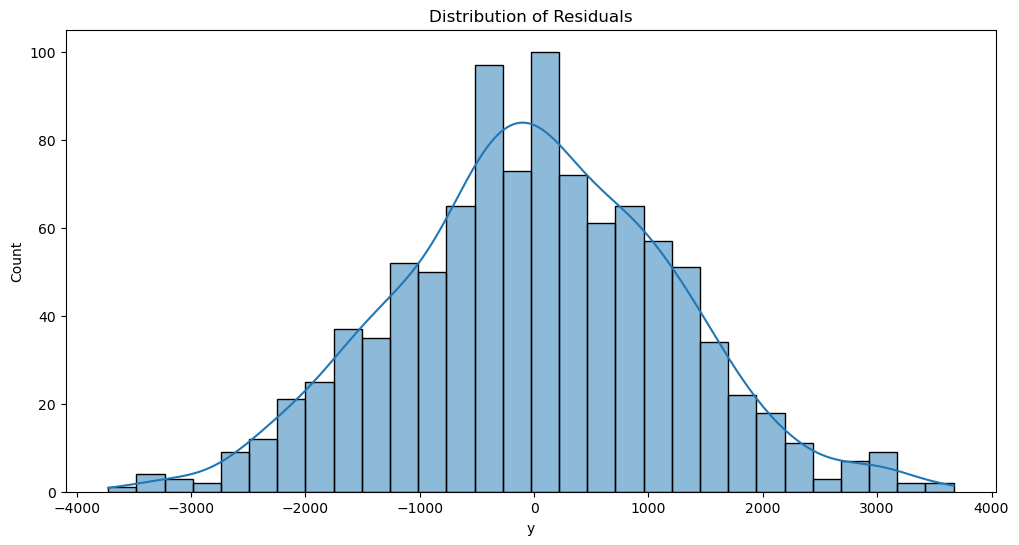

In [1021]:
residuals_orgn = y_train_orgn - y_pred_orgn
check_normality_of_residuals(residuals_orgn)

### 6.3.3. Multicollinearity.

In [1023]:
def check_multicollinearity(features, feature_names):

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation of Variables')
    plt.show()

    print('Variance Inflation Factors (VIF)')
    print('> 10: Potential multicollinearity.')
    print('> 100: Severe multicollinearity.')

    # Calculating VIF
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print(f'{feature_names[idx]}: {vif}')

    # Interpret results
    if max(VIF) > 10:
        print('Potential multicollinearity detected. Consider addressing high VIF values.')
    else:
        print('Assumption satisfied. No significant multicollinearity detected.')


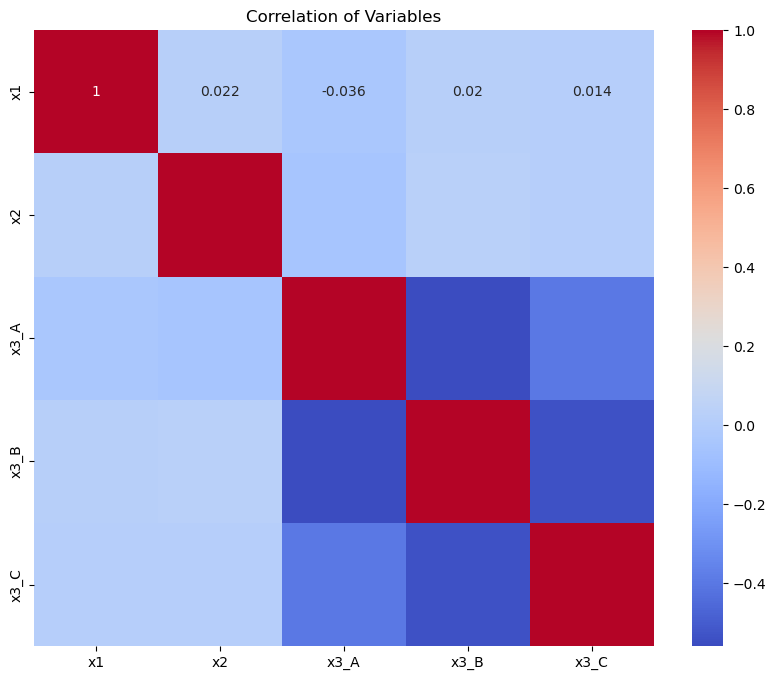

Variance Inflation Factors (VIF)
> 10: Potential multicollinearity.
> 100: Severe multicollinearity.
x1: 1.0017028649888462
x2: 1.0027357200410745
x3_A: 1.0025192074463938
x3_B: 1.0007445403585216
x3_C: 1.000315749590025
Assumption satisfied. No significant multicollinearity detected.


In [1024]:
check_multicollinearity(X_train_orgn.values, X_train_orgn.columns)

### 6.3.4. Autocorrelation

In [1026]:
def check_autocorrelation(residuals):
    
    dw_stat = durbin_watson(residuals)
    print(f'Durbin-Watson Statistic: {dw_stat}')
    print('1.5 < d < 2.5: No autocorrelation.')
    print('0 < d < 1.5: Positive autocorrelation.')
    print('2.5 < d < 4: Negative autocorrelation.')

    if dw_stat < 1.5:
        print('Signs of positive autocorrelation. Consider adding lag variables.')
    elif dw_stat > 2.5:
        print('Signs of negative autocorrelation. Consider adding lag variables.')
    else:
        print('Very small or no autocorrelation at all.')

In [1027]:
check_autocorrelation(residuals_orgn)

Durbin-Watson Statistic: 2.0509905639203385
1.5 < d < 2.5: No autocorrelation.
0 < d < 1.5: Positive autocorrelation.
2.5 < d < 4: Negative autocorrelation.
Very small or no autocorrelation at all.


### 6.3.5. Homoscedasticity.

In [1029]:
def check_homoscedasticity(residuals, predicted):

    # Displayy the residuals
    plt.subplots(figsize=(12, 6))
    plt.scatter(predicted, residuals, alpha=0.5)
    plt.axhline(0, color='darkorange', linestyle='--')
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

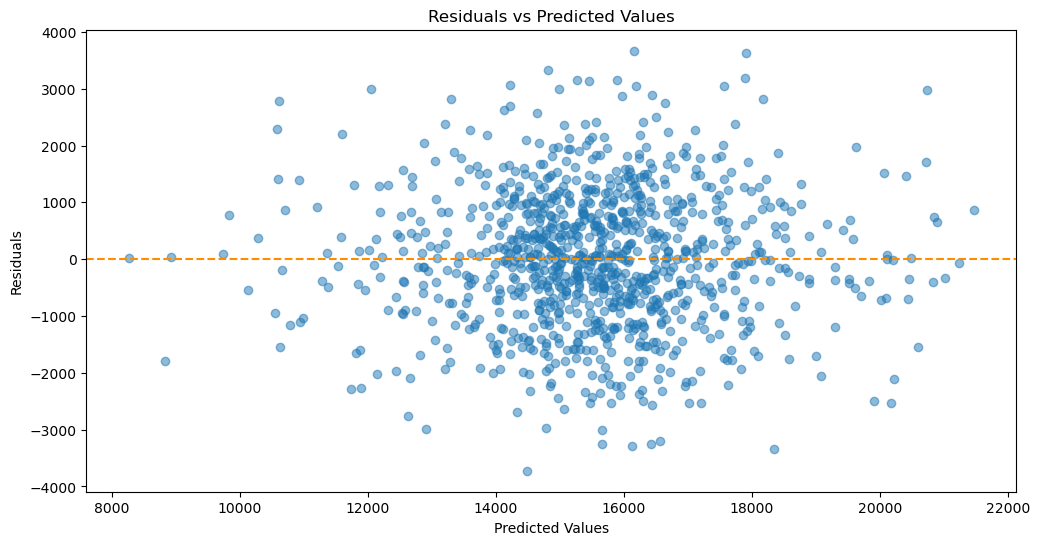

In [1030]:
check_homoscedasticity(residuals_orgn, y_pred_orgn)

---

# 7. Evaluation.

### 7.1. Load the train and test datasets

In [1034]:
# Load the train and test datasets from their pickle files
train_orgn = pd.read_pickle('./train_orgn.pkl')
test_orgn = pd.read_pickle('./test_orgn.pkl')

# Separate predictors (X) and target (y) for training data
X_train_orgn = train_orgn[['x1', 'x2', 'x3_A', 'x3_B', 'x3_C']]  # Adjust based on your dataset
y_train_orgn = train_orgn['y']

# Separate predictors (X) and target (y) for testing data
X_test_orgn = test_orgn[['x1', 'x2', 'x3_A', 'x3_B', 'x3_C']]  # Adjust based on your dataset
y_test_orgn = test_orgn['y']

# Display the first few rows for confirmation
print("Train Predictors (X_train_orgn):")
print(X_train_orgn.head())

print("\nTrain Target (y_train_orgn):")
print(y_train_orgn.head())

print("\nTest Predictors (X_test_orgn):")
print(X_test_orgn.head())

print("\nTest Target (y_test_orgn):")
print(y_test_orgn.head())


Train Predictors (X_train_orgn):
           x1        x2  x3_A  x3_B  x3_C
29   2.176025  0.840027     0     1     0
535  2.105453  0.615911     0     1     0
695 -0.359120  0.927190     0     1     0
557 -1.150748  0.159015     0     0     1
836 -0.117194 -1.712521     1     0     0

Train Target (y_train_orgn):
29     19044.196441
535    19087.939040
695    14823.142888
557    13255.882603
836    13107.678957
Name: y, dtype: float64

Test Predictors (X_test_orgn):
           x1        x2  x3_A  x3_B  x3_C
521  0.989761  0.890084     0     1     0
737 -2.904237 -0.154550     1     0     0
740  0.101330 -0.087036     0     1     0
660  0.777950  0.171279     1     0     0
411 -0.920797  1.777087     0     0     1

Test Target (y_test_orgn):
521    18118.828266
737    10644.529229
740    16748.325103
660    17096.726908
411    14632.146734
Name: y, dtype: float64



### 7.2. Evaluate the model using a test data set.

In [1036]:
# Make Predictions on Test Data
y_test_pred = model_orgn.predict(X_test_orgn)

# Calculate Metrics for Test Data
r2_test = r2_score(y_test_orgn, y_test_pred)
mse_test = mean_squared_error(y_test_orgn, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Display Test Metrics
print("Test Data:")
print(f"R2: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")

# Displayy Train Metrics
print("\nTrain Data:")
print(f"R2: {r2_orgn:.4f}")
print(f"MSE: {mse_orgn:.4f}")
print(f"RMSE: {rmse_orgn:.4f}")


Test Data:
R2: 0.7540
MSE: 1357293.9742
RMSE: 1165.0296

Train Data:
R2: 0.6950
MSE: 1454072.6613
RMSE: 1205.8494


### 7.3. Conclusion.

Final interpretation of the model evaluation metrics:

1. R2 (coefficient of determination)

A higher R2 on the test set indicates that the model generalizes exceptionally well and does not overfit. This result occurs when the test set more closely matches the patterns learned during training.

2. MSE (mean squared error)

A noticeably lower MSE on the test set shows that the model consistently makes smaller average errors in predicting the test data than the training data, further confirming its strong generalization capabilities.

3. RMSE (root mean squared error)

A lower RMSE on the test set reinforces the robust predictive ability of the model on unseen data.

* General interpretation:
  
      The model exhibits outstanding generalization, as evidenced by the test metrics outperforming the training metrics. While this may seem unusual, it is entirely acceptable because the test set more accurately captures the underlying patterns in the data. The close correspondence between the training and testing metrics clearly shows that the model avoids overfitting. Overall, both the training and testing results provide strong evidence that the model is robust and effective at making predictions.

---

# Time Series Analysis

1. Analyze Data.
   
2. Exploratory Data Analysis (EDA)
 - 2.1. Column Dropping.
 - 2.2. Data Visualization.

3. Split Dataset into train / Test
 - 3.1. Visualization train / test

4. ARIMA Model
 - 4.1 Check for Stationarity
 - 4.2. Apply First Differencing
 - 4.3. Re-check Stationarity.

5. Train Model with ARIMA.
 - 5.1 Pick hyperparameters.
 - 5.2. Set Parameters.
 - 5.3. Train the model.
 - 5.4. Display SARIMAX Results
 - 5.5. Display results with plot
 - 5.6. Forecasting.

6. Model Evaluation.
   
7. Statistical Tests.
   
8. Evaluate Predictive Capability Using a Test Data Set.
 - 8.1. Display Model Summary.

    Time series data, which means any information collected over a regular interval of time, is frequently used in business operations to predict trends or make forecasts. Examples include daily stock prices, energy consumption rates, social media engagement metrics and retail demand, among others.

# 1. Analyze Data.

In [1044]:
# Import dataset
file_path = '~/Documents/Jupyter/Data_Playground/ts_data/ts1.csv'
ts_data = pd.read_csv(file_path)
ts_data.head(5)

,Unnamed: 0,x
0,1,174.070007
1,2,174.720001
2,3,175.600006
3,4,178.960007
4,5,177.770004


In [1045]:
# Dataset overview
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  401 non-null    int64  
 1   x           401 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


In [1046]:
# Display min, max, mean, std
ts_data['x'].describe()

count    401.000000
mean     160.427731
std       17.269618
min      125.019997
25%      146.630005
50%      157.960007
75%      174.490005
max      196.449997
Name: x, dtype: float64

In [1047]:
# Count missing values
ts_data.isnull().sum()

Unnamed: 0    0
x             0
dtype: int64

Results:

    Overview

    401 rows and 2 columns, seem like column `Unnamed` is the index column, this column can be deleted. Column `x` is the data to work with. ANd both columns has no missing data.


    Statistics for column `x`

    Mean: 160.43
    Standard Deviation: 17.27
    Range: From 125.02 to 196.45

#  2. Exploratory Data Analysis (EDA)

###  2.1. Column Dropping.

In [1051]:
# Drop the `Unnamed` column
ts_data = ts_data.drop(columns=['Unnamed: 0'], errors='ignore')

In [1052]:
# Display the result
ts_data.head(5)

,x
0,174.070007
1,174.720001
2,175.600006
3,178.960007
4,177.770004


###  2.2. Data Visualization.

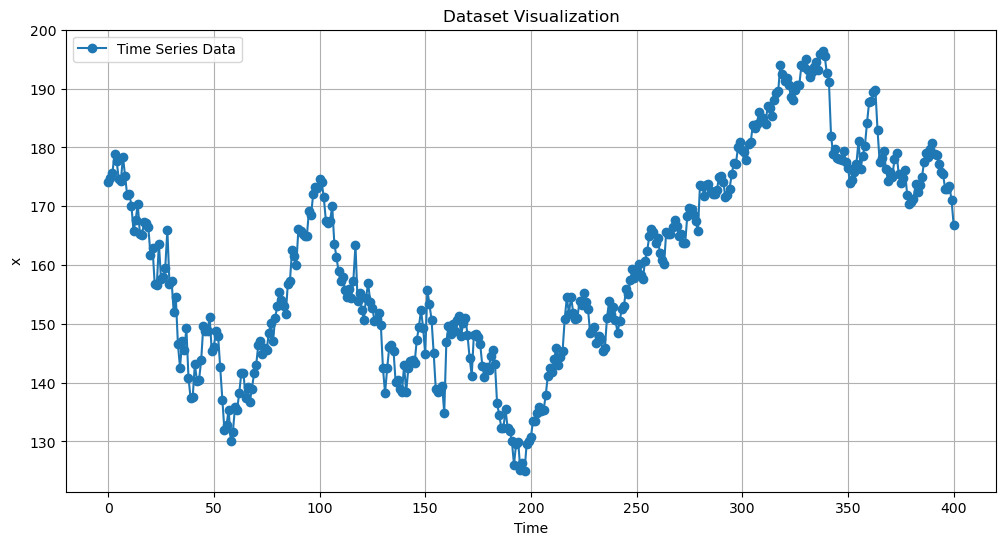

In [1054]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(ts_data['x'], marker='o', label='Time Series Data')
plt.title('Dataset Visualization')
plt.xlabel('Time')
plt.ylabel('x')
plt.grid(True)
plt.legend()
plt.show()

# 3. Split Dataset into train / Test

    As it was mentioned in the project requirements the dataset must be split the data into consecutive training and test partitions. The choice of split ratio is left up to me. For instance, it could be split into 80% of the data to train and the remaining 20% to test.

In [1057]:
# Specifying the ratio of the training data size
train_ratio = 0.8

# Calculate 80% 
train_size = int(len(ts_data) * train_ratio)
train_size

320

    In time series data, it is essential not to shuffle the dataset before splitting it into training and testing sets. Time series models depend on the chronological order of timestamps to make accurate predictions based on past data. Consequently, I will use slicing to effectively split the data into training and testing sets.

In [1059]:
# Use 80% for training
train_data = ts_data[:train_size]

# Use 20% for testing
test_data = ts_data[train_size:]

In [1060]:
train_data.shape, test_data.shape

((320, 1), (81, 1))

### 3.1. Visualization train / test

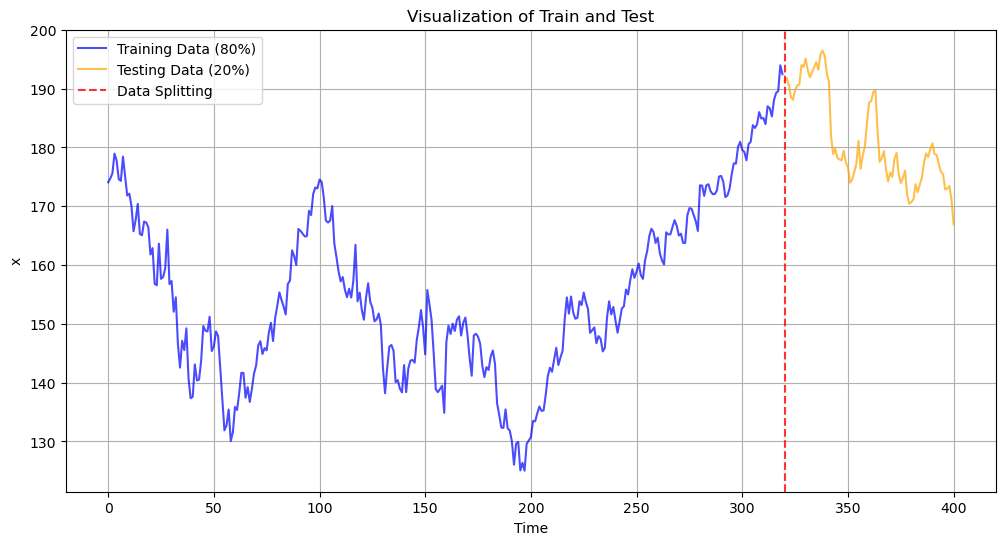

In [1062]:
# Visualize the train and test data using Plot
plt.figure(figsize=(12, 6))

# Plot for training data
plt.plot(train_data.index, train_data['x'], label='Training Data (80%)', color='blue', alpha=0.7)
# Plot for testing data
plt.plot(test_data.index, test_data['x'], label='Testing Data (20%)', color='orange', alpha=0.7)

# Display the splitting point
plt.axvline(x=train_size, color='red', linestyle='--', label='Data Splitting', alpha=0.8)

# Display the results
plt.title('Visualization of Train and Test')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.grid(True)
plt.show()

#  4. ARIMA Model

    Time series data is inherently a sequence of data points that must be analyzed with their timestamps. Each data sample is indexed by its timestamp, establishing time as a critical factor in any time series analysis. This type of data is essential in various fields, for example: weather forecasting, stock price predictions, user subscriptions, and sales patterns.

    Time series forecasting is a powerful technique that allows for accurate predictions of future values based on historical data. The AutoRegressive Integrated Moving Average (ARIMA) model stands out as an effective tool in this realm. It leverages autocorrelation measures to capture the essential temporal structures within the data, enabling precise predictions.

    The autoregression aspect of the ARIMA model effectively measures how a particular data point depends on its past observations. To ensure that data patterns are stationary—a vital requirement for robust analysis—differences between observations are calculated and integrated. This approach minimizes correlation with past data, adhering to the critical assumptions of linear regression models regarding linear independence and lack of collinearity. Furthermore, the moving average component sharpens the focus on significant features within the data, providing clarity and insight for forecasting.

### 4.1 Check for Stationarity

    A time series is definitively categorized as either stationary or non-stationary. A stationary time series exhibits statistical properties that remain constant over time; the mean, variance, and autocorrelation do not fluctuate within the dataset. Most effective statistical forecasting methods, including ARIMA, operate under the critical assumption that time series data can be transformed to approximate stationarity. Predicting a stationary series is significantly more straightforward since the statistical properties can be reliably expected to mirror those of the past in future observations. Conversely, while it is possible to analyze non-stationary data, it poses substantial challenges, particularly when utilizing methods like ARIMA.

    
    - if p-value > 0.05 then the data has a unit root and is non-stationary.
    - if p-value <= 0.05 then this means that the data does not have a unit root and is stationary.

In [1067]:
# Use the values from the `x` feature
X = train_data['x'].values
X = np.log(X)

# Perform Augmented Dickey-Fuller test
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Display critical values
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Display the result
if result[1] <= 0.05:
    print("p-value <= 0.05, this is why the series is stationary.")
else:
    print("p-value > 0.05, this is why the series is non-stationary.")

ADF Statistic: -1.403977
p-value: 0.580368
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
p-value > 0.05, this is why the series is non-stationary.


### 4.2. Apply First Differencing

    If a time series is found to be non-stationary, it may be possible to transform it into a stationary time series through a process called “differencing.” This involves subtracting consecutive observations from one another, which can help to remove any trend or seasonality in the data. Taking the natural logarithm of the data can make some non-stationary time series stationary.

    It’s worth noting that not all time series are stationary. Many real-world time series data are non-stationary. It’s important to be aware of this assumption in time series analysis and take appropriate steps to account for non-stationarity. Furthermore, non-stationarity can be due to multiple reasons, such as trend, seasonality, and irregularity. Therefore, in order to make it stationary, it’s important to identify the type of non-stationarity.

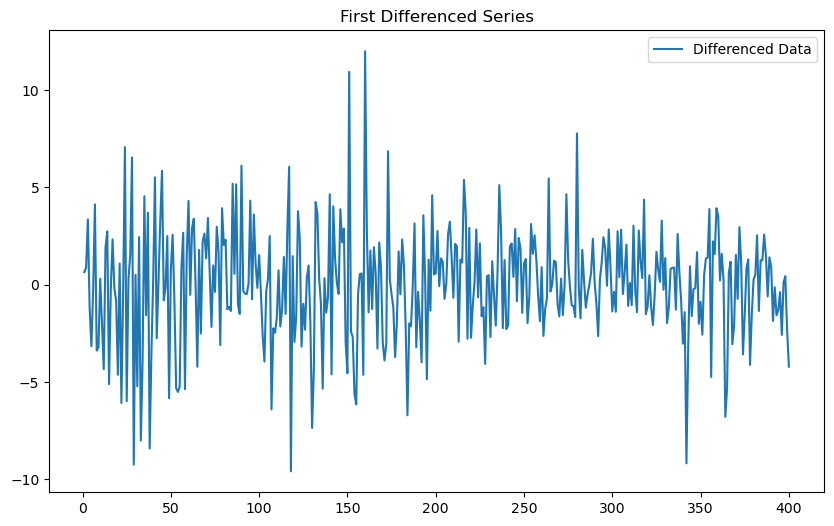

In [1070]:
# Apply first differencing
ts_data['x_diff'] = ts_data['x'].diff()

# Drop NA values which might accurs during differencing
ts_data_diff = ts_data.dropna()

# Display the differenced series
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ts_data_diff['x_diff'], label='Differenced Data')
plt.title('First Differenced Series')
plt.legend()
plt.show()

### 4.3. Re-check Stationarity.

In [1072]:
# Use the values from the differenced `x` feature
X_diff = ts_data_diff['x_diff'].values

# Perform Augmented Dickey-Fuller test
result = adfuller(X_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Display critical values
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Display the result
if result[1] <= 0.05:
    print("p-value <= 0.05, this is why the series is stationary.")
else:
    print("p-value > 0.05, this is why the series is non-stationary.")

ADF Statistic: -20.456596
p-value: 0.000000
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571
p-value <= 0.05, this is why the series is stationary.


# 5. Train Model with ARIMA.

    ARIMA Parameters Explanation

    The components of an ARIMA model are critical parameters, clearly denoted in a standardized format. An ARIMA model is unequivocally represented as ARIMA(p, d, q), where p, d, and q are specific integer values that accurately define the type of ARIMA model being utilized. The parameters are defined as follows:

- p: This is the number of lag observations in the model, known as the lag order.
- d: This represents the number of times the raw observations are differenced, a key concept referred to as the degree of differencing.
- q: This indicates the size of the moving average window, known as the order of the moving average.

        For example, in a linear regression model, the number and type of terms are explicitly specified. A parameter value of zero (0) signals that a particular component will not be included in the model. Hence, the ARIMA model can effectively function as an ARMA model, or even as a simple AR, I, or MA model.
  

- AR (p): The Auto-Regressive term defines how past values directly influence the current value. The coefficients of the AR terms demonstrate the magnitude of this influence.
- I (d): The Integrated term indicates the degree of differencing applied to achieve stationarity in the series. While this term lacks coefficients, it is an essential preprocessing step.
- MA (q): The Moving Average term illustrates how past forecast errors are systematically incorporated into the model. The coefficients of the MA terms decisively reflect the weights assigned to these past errors.


### 5.1 Pick hyperparameters.

In [1076]:
import optuna
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define the objective function for optimization
def objective(trial):
    p = trial.suggest_int('p', 0, 4)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 4)
    
    try:
        model = ARIMA(ts_data['x'], order=(p, d, q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_data))
        mse = mean_squared_error(test_data['x'], forecast)
        return mse
    except:
        return float('inf')

# Create and optimize study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Display best parameters
results = study.best_params
print("Best Parameters:", results)

[I 2024-11-25 18:09:13,798] A new study created in memory with name: no-name-d8c4ad67-4d01-4fc1-b8ae-0c446615d805
[I 2024-11-25 18:09:13,966] Trial 0 finished with value: 267.65113181563544 and parameters: {'p': 2, 'd': 1, 'q': 1}. Best is trial 0 with value: 267.65113181563544.
/home/kosmas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kosmas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/kosmas/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimiza

Best Parameters: {'p': 0, 'd': 1, 'q': 2}


### 5.2. Set Parameters.

In [1078]:
# Set parameters
p, d, q = results['p'], results['d'], results['q']

### 5.3. Train the model.

In [1080]:
# Fit the model
model = ARIMA(ts_data['x'], order=(p, d, q))
model_fit = model.fit()

### 5.4. Display SARIMAX Results

In [1082]:
# Display the summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  401
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -991.923
Date:                Mon, 25 Nov 2024   AIC                           1989.847
Time:                        18:09:23   BIC                           2001.821
Sample:                             0   HQIC                          1994.589
                                - 401                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0293      0.046     -0.631      0.528      -0.120       0.062
ma.L2         -0.0751      0.051     -1.478      0.139      -0.175       0.024
sigma2         8.3454      0.483     17.265      0.0

### 5.5. Display results with plot

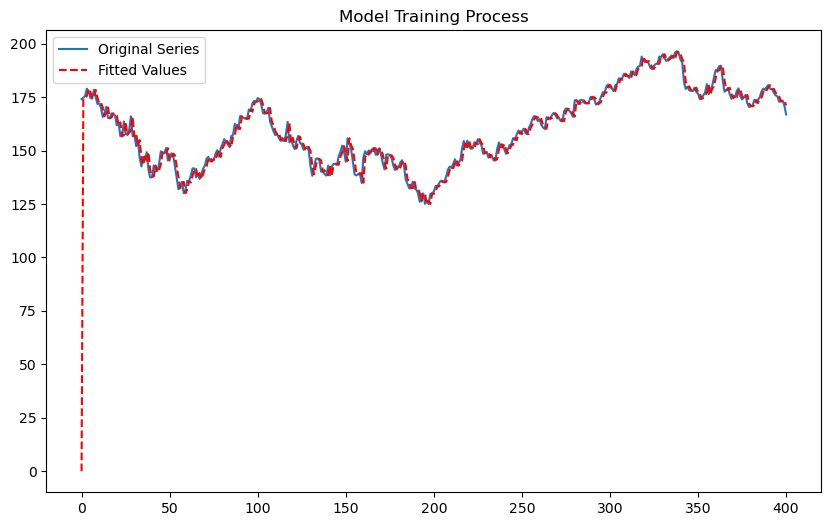

In [1084]:
# Plot the model's fitted values
plt.figure(figsize=(10, 6))
plt.plot(ts_data['x'], label='Original Series')
plt.plot(model_fit.fittedvalues, color='red', linestyle='--', label='Fitted Values')
plt.title('Model Training Process')
plt.legend()
plt.show()

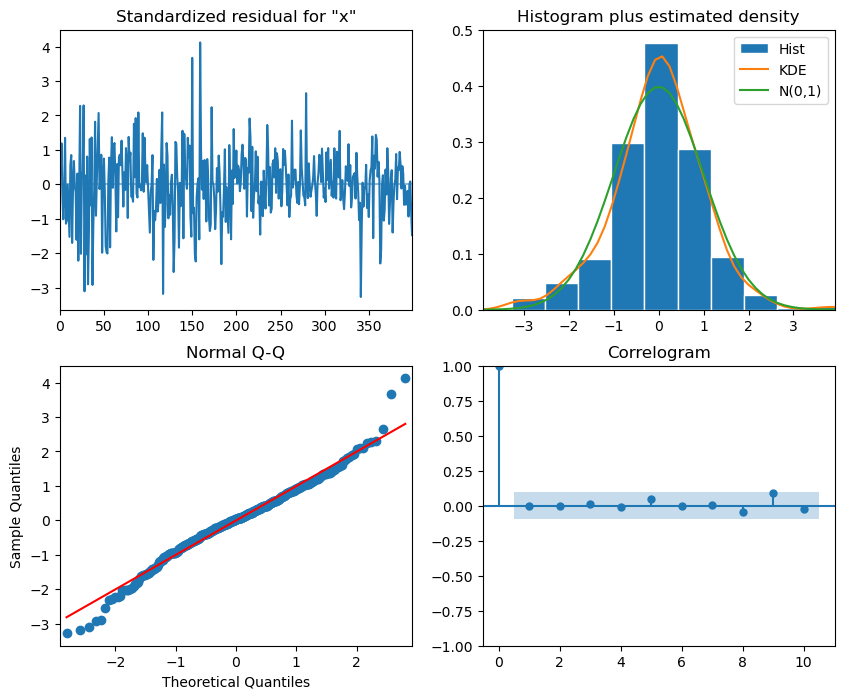

In [1085]:
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

### 5.6. Forecasting.

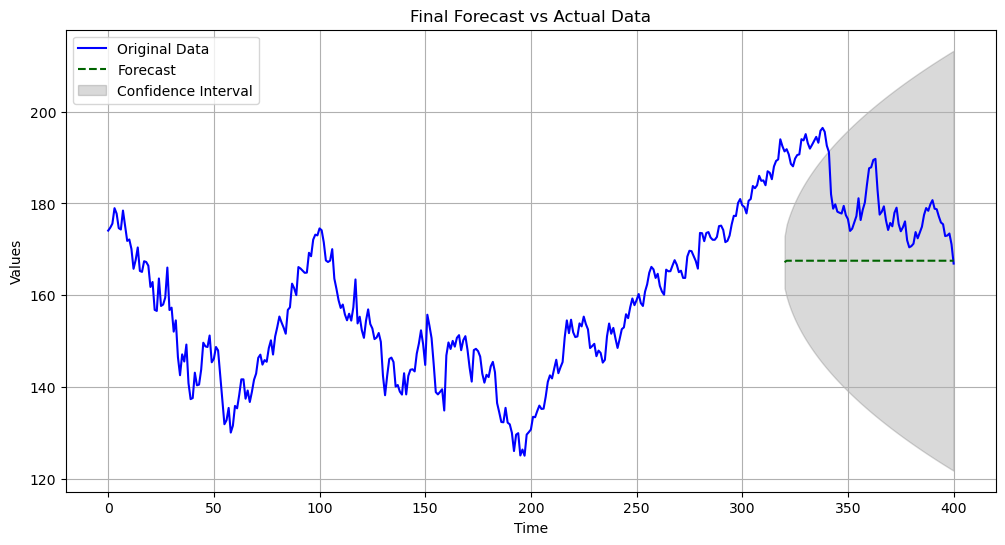

In [1087]:
# Set periods num
n_periods = len(test_data)
forecast_results = model_fit.get_forecast(steps=n_periods)

# Extract forecast mean and confidence intervals
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int(alpha=0.05)

# Create Pandas Series for plotting
fc_series = pd.Series(forecast.values, index=test_data.index)
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test_data.index)
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test_data.index)

# Plot original data and forecast
plt.figure(figsize=(12, 6))

# Plot original dataset
plt.plot(ts_data['x'], label='Original Data', color='blue')

# Plot forecasted values
plt.plot(fc_series, label='Forecast', color='darkgreen', linestyle='--')

# Plot confidence intervals
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.15, label='Confidence Interval')

# Add labels, title, and legend
plt.title("Final Forecast vs Actual Data")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# 6. Model Evaluation.

In [1089]:
mean_value = ts_data['x'].mean()
print(f"Mean value: {mean_value}")
print(f"Mean value in percentage: {rmse / mean_value * 100:.2f}%")

Mean value: 160.42773077910084
Mean value in percentage: 9.96%


In [1090]:
# Forecast on the test data
forecast_results = model_fit.get_forecast(steps=len(test_data))
forecast = forecast_results.predicted_mean

# Exclude the first value due to differencing
actual = test_data['x'].values

# Compute evaluation metrics
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(actual, forecast)

# Display Results
print("Model Evaluation Metrics:")
print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.4f}")
print(f"\nR-Squared (R2): {r2:.4f}")

Model Evaluation Metrics:

Mean Squared Error (MSE): 255.1742

Root Mean Squared Error (RMSE): 15.9742

R-Squared (R2): -3.1308


# 7. Statistical Tests.

In [1092]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")

Durbin-Watson Statistic: 1.0918


In [1093]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

    lb_stat  lb_pvalue
10  0.60302   0.999984


# 8. Evaluate Predictive Capability Using a Test Data Set.

/tmp/ipykernel_6395/209985702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'ARIMA_pred'] = forecast


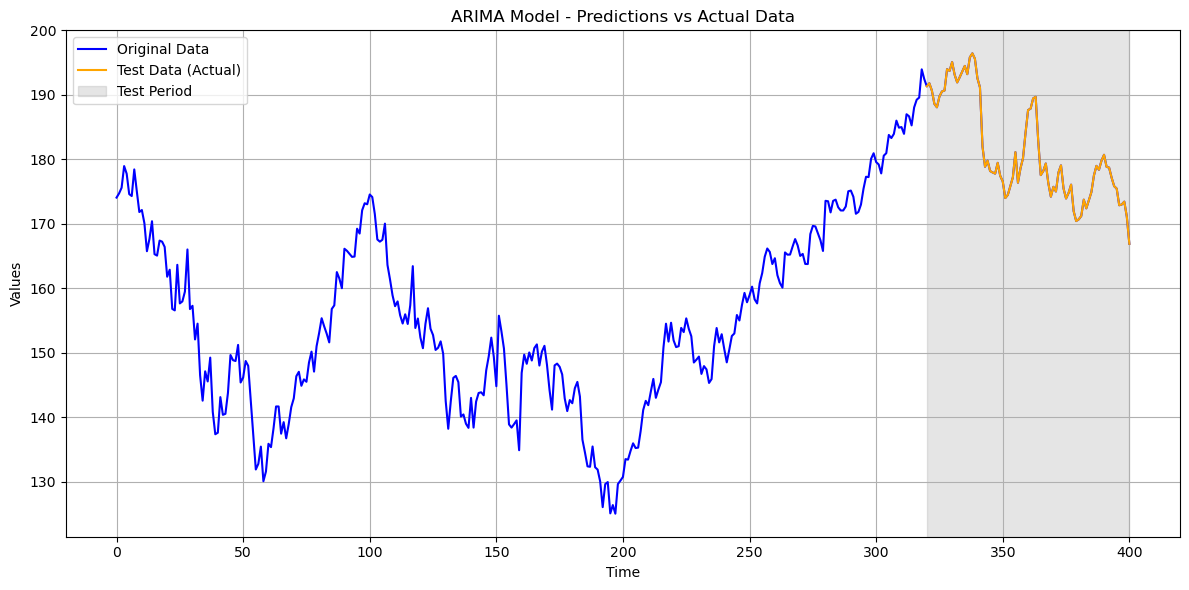

In [1095]:
# Train ARIMA on the test dataset
forecast_results = model_fit.get_forecast(steps=len(test_data))
forecast = forecast_results.predicted_mean

# Adding predictions to the test dataset using .loc
test_data.loc[:, 'ARIMA_pred'] = forecast

# Adding the data and prediction
fig, ax = plt.subplots(figsize=(12, 6))

# Time series data
ax.plot(ts_data.index, ts_data['x'], label='Original Data', color='blue')

# Testdata
ax.plot(test_data.index, test_data['x'], label='Test Data (Actual)', color='orange')

# Add a Plot Details
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.axvspan(test_data.index[0], test_data.index[-1], color='#808080', alpha=0.2, label='Test Period')
ax.set_title('ARIMA Model - Predictions vs Actual Data')
ax.legend(loc='upper left')
plt.grid(True)

# Display Results
plt.tight_layout()
plt.show()


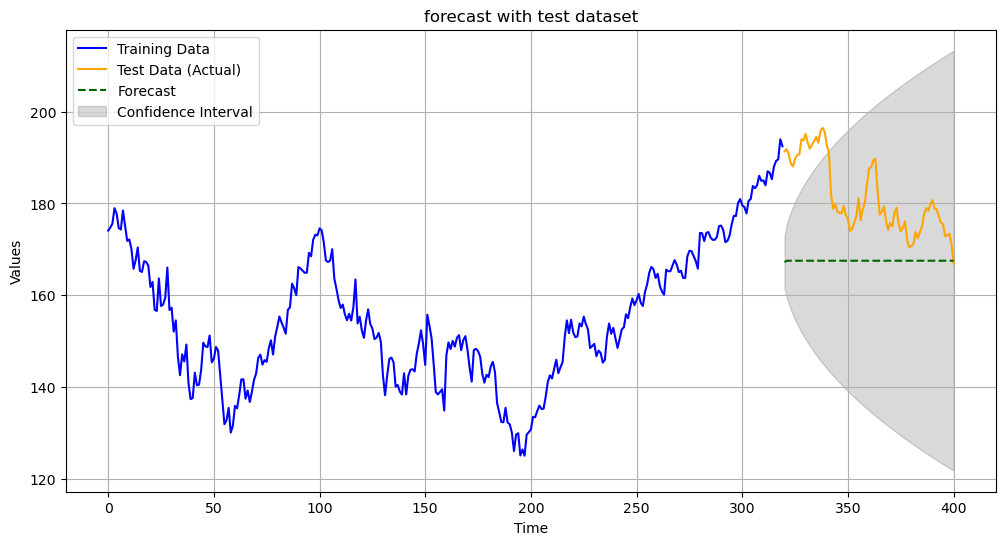

In [1096]:
# Create independent copies of train and test data to avoid SettingWithCopyWarning
train_data = ts_data.iloc[:train_size].copy()
test_data = ts_data.iloc[train_size:].copy()

# Forecasting
forecast_results = model_fit.get_forecast(steps=len(test_data))
forecast = forecast_results.predicted_mean  # Predicted values
conf = forecast_results.conf_int(alpha=0.05)  # Confidence intervals

# Align forecast index with test data
forecast.index = test_data.index
conf.index = test_data.index

# Add predictions and confidence intervals to test data
test_data['ARIMA_pred'] = forecast
test_data['Lower_CI'] = conf.iloc[:, 0]
test_data['Upper_CI'] = conf.iloc[:, 1]

# Plot the original data, predictions, and confidence intervals
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train_data.index, train_data['x'], label='Training Data', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['x'], label='Test Data (Actual)', color='orange')

# Plot model predictions
plt.plot(test_data.index, test_data['ARIMA_pred'], label='Forecast', color='darkgreen', linestyle='--')

# Plot confidence intervals
plt.fill_between(test_data.index, test_data['Lower_CI'], test_data['Upper_CI'], 
                 color='k', alpha=0.15, label='Confidence Interval')

# Add plot details
plt.title("forecast with test dataset")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


### 8.1. Display Model Summary.

In [1098]:
# Display Model Summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  401
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -991.923
Date:                Mon, 25 Nov 2024   AIC                           1989.847
Time:                        18:09:25   BIC                           2001.821
Sample:                             0   HQIC                          1994.589
                                - 401                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0293      0.046     -0.631      0.528      -0.120       0.062
ma.L2         -0.0751      0.051     -1.478      0.139      -0.175       0.024
sigma2         8.3454      0.483     17.265      0.0

# References.

[dtypes] https://www.geeksforgeeks.org/pandas-dataframe-dtypes/

[Missing data] https://medium.com/analytics-vidhya/why-it-is-important-to-handle-missing-data-and-10-methods-to-do-it-29d32ec4e6a

[data cleaning] https://www.deepchecks.com/what-is-data-cleaning/

[outliers] https://www.scribbr.com/statistics/outliers/

[categorical data] https://towardsdatascience.com/handling-categorical-data-the-right-way-9d1279956fc6

[var relationship] https://towardsdatascience.com/how-to-measure-relationship-between-variables-d0606df27fd8

[correlation] https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

[correlation-coefficient] https://www.scribbr.com/statistics/correlation-coefficient/

[explore data] https://www.ibm.com/topics/exploratory-data-analysis

[distributions] https://seaborn.pydata.org/tutorial/distributions.html

[categorical data] https://seaborn.pydata.org/tutorial/categorical.html

[feature processes] https://www.ibm.com/topics/feature-engineering

[plots] https://medium.com/@daython3/7-essential-plots-for-categorical-and-numerical-data-4b96c0278106

[heatmap] https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

[detecting outliers] https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

[missing values] https://medium.com/@mahnoorsalman96/checking-for-missing-values-for-machine-learning-

[feature scaling] https://medium.com/@punya8147_26846/understanding-feature-scaling-in-machine-learning-fe2ea8933b66

[multicollinearity] https://hex.tech/blog/detecting-and-remedying-multicollinearity/ 

[dummies] https://note.nkmk.me/en/python-pandas-get-dummies/

[split train and test] https://towardsdatascience.com/how-to-split-a-dataframe-into-train-and-test-set-with-python-eaa1630ca7b3

[pickle] https://medium.com/@reza.shokrzad/pickle-json-or-parquet-unraveling-the-best-data-format-for-speedy-ml-solutions-10c3f7bf4d0c

<!--Train the Model-->

[from_dict()] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html

[hyperparameter] https://www.geeksforgeeks.org/hyperparameter-tuning-in-linear-regression/

[stats model] https://www.statsmodels.org/stable/index.html

<!-- Testing Linear Regression Assumptions in Python  -->

[Linear Regression Assumptions] https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

[formatting] https://saturncloud.io/blog/tables-in-markdown-in-jupyter/

<!-- Time Series -->

[drop column] https://www.scicoding.com/how-to-drop-columns-in-pandas-dataframes/

[Time Series Visualization] https://www.geeksforgeeks.org/time-series-data-visualization-in-python/

[Slicing] https://www.w3schools.com/python/numpy/numpy_array_slicing.asp

[ARIMA Model] https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

[stationary] https://www.ibm.com/topics/arima-model

[stationary check] https://machinelearningmastery.com/time-series-data-stationary-python/

[Augmented Dickey-Fuller test] https://machinelearningmastery.com/time-series-data-stationary-python/

[Forecasting] https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting

[Differencing] https://machinelearningmastery.com/difference-time-series-dataset-python/
